## Capstone Project on Credit Card Approval Prediction

### Import Libraries

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc 
from sklearn.model_selection import cross_val_score
from sklearn.metrics._plot.roc_curve import auc

### Import Datasets

In [189]:
dataset_1 = pd.read_csv(r"C:\Users\Kirti Ranjan\Desktop\OdinSchool\Python\Capstone Project\Credit Card-Dataset\Credit_card.csv")
dataset_1.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [190]:
dataset_1.shape

(1548, 18)

dataset_1 has 1548 number of observations and 18 columns.

In [191]:
dataset_2 = pd.read_csv(r"C:\Users\Kirti Ranjan\Desktop\OdinSchool\Python\Capstone Project\Credit Card-Dataset\Credit_card_label.csv")
dataset_2.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [192]:
dataset_2.shape

(1548, 2)

dataset_2 has 1548 number of observations and 2 columns.

We have two different datasets, dataset_1 has independent variables and dataset_2 contains target variable, so we need to merge the two datasets based on the common column Ind_ID.

In [193]:
dataset_raw = pd.merge(dataset_1, dataset_2, on = "Ind_ID")
dataset_raw.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [194]:
dataset_raw.shape

(1548, 19)

The merged dataset has 1548 number of observations and 19 columns.

In [195]:
dataset = dataset_raw.copy()

In [196]:
dataset.sample(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1060,5089275,F,Y,N,0,315000.0,Working,Higher education,Married,House / apartment,-13592.0,-3504,1,0,1,1,Accountants,2,0
892,5113639,F,N,N,0,135000.0,Pensioner,Higher education,Married,Municipal apartment,-19700.0,365243,1,0,0,0,NaN,2,0
944,5068147,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-20441.0,365243,1,0,0,0,NaN,1,0
1165,5079181,F,N,N,0,112500.0,Commercial associate,Incomplete higher,Married,House / apartment,-10177.0,-2339,1,0,1,0,NaN,2,0
471,5089626,F,N,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-16188.0,-309,1,1,1,1,Sales staff,2,0


In [197]:
dataset.shape

(1548, 19)

In [198]:
dataset.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

##### Renaming the features name

In [199]:
dataset = dataset.rename(columns={'Ind_ID':'Ind_id', 'GENDER': 'Gender', 'Propert_Owner':'Property_Owner', 'CHILDREN': 'Children', 'Annual_income':'Annual_Income', 'Type_Income': 'Income_Type', 'EDUCATION': 'Education', 'Marital_status': 'Marital_Status', 'Housing_type': 'Housing_Type', 'Birthday_count': 'Birthday_Count', 'Employed_days': 'Employed_Days', 'Mobile_phone': 'Mobile_Phone','EMAIL_ID':'Email_id', 'Type_Occupation':'Occupation_Type'})
dataset.head()

,Ind_id,Gender,Car_Owner,Property_Owner,Children,Annual_Income,Income_Type,Education,Marital_Status,Housing_Type,Birthday_Count,Employed_Days,Mobile_Phone,Work_Phone,Phone,Email_id,Occupation_Type,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [200]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_id           1548 non-null   int64  
 1   Gender           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Property_Owner   1548 non-null   object 
 4   Children         1548 non-null   int64  
 5   Annual_Income    1525 non-null   float64
 6   Income_Type      1548 non-null   object 
 7   Education        1548 non-null   object 
 8   Marital_Status   1548 non-null   object 
 9   Housing_Type     1548 non-null   object 
 10  Birthday_Count   1526 non-null   float64
 11  Employed_Days    1548 non-null   int64  
 12  Mobile_Phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  Email_id         1548 non-null   int64  
 16  Occupation_Type  1060 non-null   object 
 17  Family_Members

In [201]:
dataset.nunique()

Ind_id             1548
Gender                2
Car_Owner             2
Property_Owner        2
Children              6
Annual_Income       115
Income_Type           4
Education             5
Marital_Status        5
Housing_Type          6
Birthday_Count     1270
Employed_Days       956
Mobile_Phone          1
Work_Phone            2
Phone                 2
Email_id              2
Occupation_Type      18
Family_Members        7
label                 2
dtype: int64

In the given dataset, we have 1548 number of different Ind_id, 1270 number of different Birthday_Count, 956 different Employed_Days, 115 different Annual_Income, 18 unique Occupation_Type, 7 different types of Family_Members, 6 unique data in Children and Housing_Type, 5 unique data in Education, Marital_Status, 4 different Income_Type, 2 unique data in Gender, Car_Owner, Property_Owner, Work_Phone, Phone, Email_id and label.

In [202]:
dataset.duplicated().sum()

0

The dataset has no duplicate information.

In [203]:
dataset.head()

,Ind_id,Gender,Car_Owner,Property_Owner,Children,Annual_Income,Income_Type,Education,Marital_Status,Housing_Type,Birthday_Count,Employed_Days,Mobile_Phone,Work_Phone,Phone,Email_id,Occupation_Type,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In Birthday_Count column, the Age is given in terms of days which are in -ve value, so 0 means current day and -1 means yesterday.

In Employed_Days column, employment days are counted in backward from current day (0). Positive value means, individual is currently unemployed.

So, changing Birthday_Count feature to Age and Employed_Days to Experience.

In [204]:
# converting the negative values to actual age

dataset['Age'] = abs(round((dataset['Birthday_Count']/365),0))

Creating the Age column by dividing the Birthday_Count with 365, because Birthday_Count is given in number of days and we are converting this into age in years.

In [205]:
# converting the negative values to actual exprience of the employee

dataset['Experience'] = abs(round((dataset['Employed_Days']/365),0))

Similar to the Age, we get experience in years by dividing employed_days with 365.

In [206]:
dataset.drop(columns=['Birthday_Count','Employed_Days'], inplace=True)

In [207]:
dataset.head()

,Ind_id,Gender,Car_Owner,Property_Owner,Children,Annual_Income,Income_Type,Education,Marital_Status,Housing_Type,Mobile_Phone,Work_Phone,Phone,Email_id,Occupation_Type,Family_Members,label,Age,Experience
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,1,0,0,0,NaN,2,1,51.0,1001.0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.0,2.0
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,NaN,2.0
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.0,2.0
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.0,2.0


In [208]:
dataset.shape

(1548, 19)

We have deleted Birthday_Count and Employed_Days columns, as we have already created two new columns as Age and Experience by converting the no. of days to no. of year.

In [209]:
dataset.describe()

,Ind_id,Children,Annual_Income,Mobile_Phone,Work_Phone,Phone,Email_id,Family_Members,label,Age,Experience
count,1.548000e+03,1548.000000,1.525000e+03,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1526.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,1.0,0.208010,0.309432,0.092377,2.161499,0.113049,43.952818,174.844315
std,4.171759e+04,0.776691,1.132530e+05,0.0,0.406015,0.462409,0.289651,0.947772,0.316755,11.603295,372.211315
min,5.008827e+06,0.000000,3.375000e+04,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,21.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,1.0,0.000000,0.000000,0.000000,2.000000,0.000000,34.000000,3.000000
50%,5.078842e+06,0.000000,1.665000e+05,1.0,0.000000,0.000000,0.000000,2.000000,0.000000,43.000000,7.000000
75%,5.115673e+06,1.000000,2.250000e+05,1.0,0.000000,1.000000,0.000000,3.000000,0.000000,54.000000,17.000000
max,5.150412e+06,14.000000,1.575000e+06,1.0,1.000000,1.000000,1.000000,15.000000,1.000000,68.000000,1001.000000


From the above obsevation we can see that, the minimum Age is 21 years and the maximum Age is 68 years, but the minimum experience is 0 years and maximum experience is 1001 years, which is not possible.

In [210]:
dataset[dataset['Experience']>=1000].shape

(261, 19)

There are 261 observations in the dataset, where the experience is above 1000 years.

In [211]:
dataset=dataset[dataset['Experience']<1000]

Dropping the observations which have experience greater than or equal to 1000 years

In [212]:
dataset.head()

,Ind_id,Gender,Car_Owner,Property_Owner,Children,Annual_Income,Income_Type,Education,Marital_Status,Housing_Type,Mobile_Phone,Work_Phone,Phone,Email_id,Occupation_Type,Family_Members,label,Age,Experience
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.0,2.0
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,NaN,2.0
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.0,2.0
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.0,2.0
5,5009753,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.0,2.0


In [213]:
dataset.shape

(1287, 19)

In [214]:
dataset.describe()

,Ind_id,Children,Annual_Income,Mobile_Phone,Work_Phone,Phone,Email_id,Family_Members,label,Age,Experience
count,1.287000e+03,1287.00000,1.268000e+03,1287.0,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1269.000000,1287.000000
mean,5.079966e+06,0.48951,1.995793e+05,1.0,0.250194,0.310023,0.108003,2.263403,0.108780,40.701340,7.302253
std,4.159578e+04,0.82421,1.169466e+05,0.0,0.433293,0.462683,0.310505,0.977072,0.311484,9.694864,6.577296
min,5.008865e+06,0.00000,3.600000e+04,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,21.000000,0.000000
25%,5.045770e+06,0.00000,1.350000e+05,1.0,0.000000,0.000000,0.000000,2.000000,0.000000,33.000000,3.000000
50%,5.086062e+06,0.00000,1.800000e+05,1.0,0.000000,0.000000,0.000000,2.000000,0.000000,40.000000,5.000000
75%,5.115934e+06,1.00000,2.266875e+05,1.0,0.500000,1.000000,0.000000,3.000000,0.000000,48.000000,10.000000
max,5.150221e+06,14.00000,1.575000e+06,1.0,1.000000,1.000000,1.000000,15.000000,1.000000,65.000000,41.000000


Now the experience varies from 0 years to 41 years.

### Exploratory Data Analysis (EDA)

In [215]:
dataset.dtypes

Ind_id               int64
Gender              object
Car_Owner           object
Property_Owner      object
Children             int64
Annual_Income      float64
Income_Type         object
Education           object
Marital_Status      object
Housing_Type        object
Mobile_Phone         int64
Work_Phone           int64
Phone                int64
Email_id             int64
Occupation_Type     object
Family_Members       int64
label                int64
Age                float64
Experience         float64
dtype: object

#### Univariate Analysis

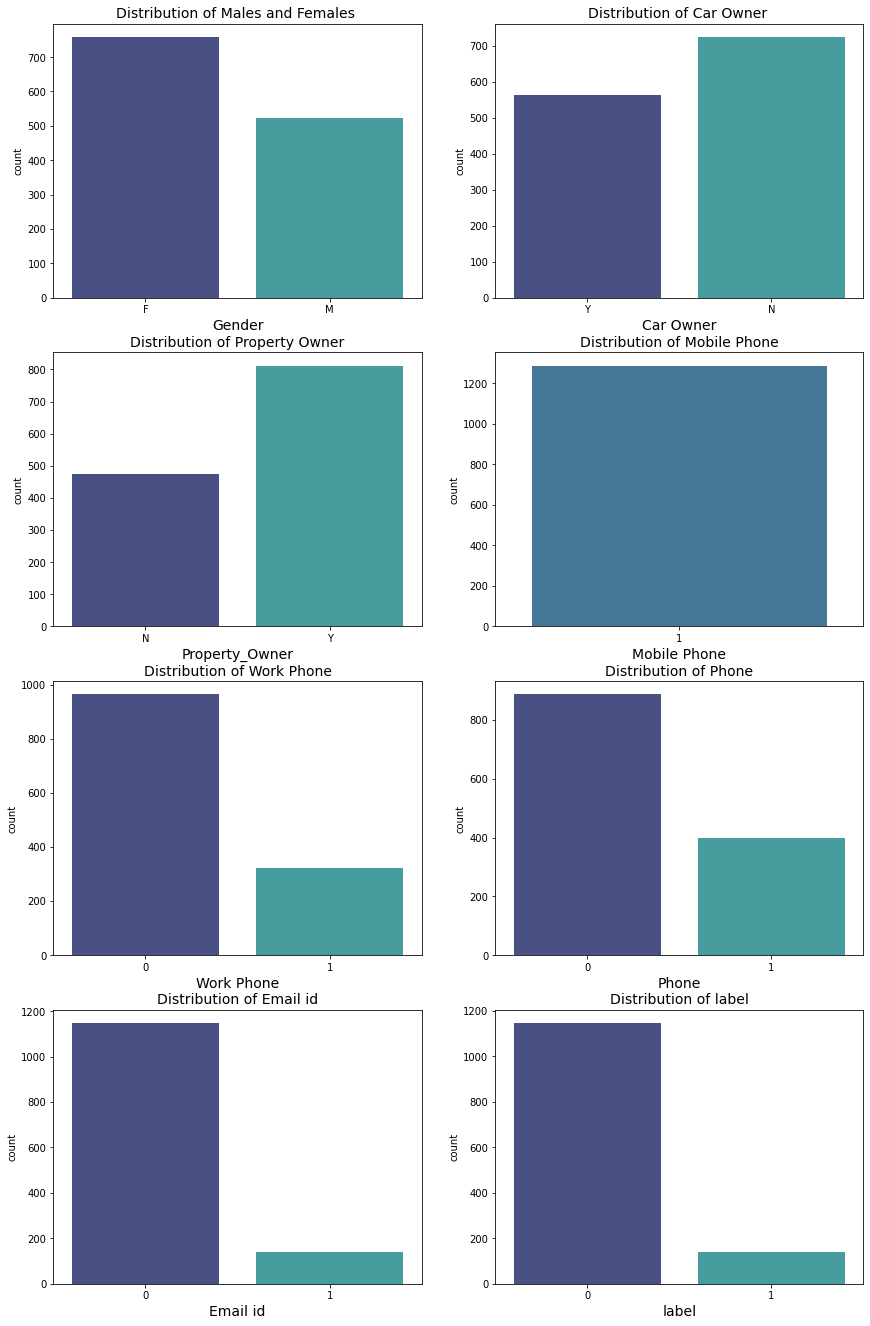

In [216]:
plt.figure(figsize=(6, 20))

plt.subplot(4,2,1)
sns.countplot(x='Gender', data = dataset, palette = 'mako')
plt.xlabel('Gender', fontsize = 14)
plt.title('Distribution of Males and Females ', fontsize = 14)

plt.subplot(4,2,2)
sns.countplot(x='Car_Owner', data = dataset, palette = 'mako')
plt.xlabel('Car Owner', fontsize = 14)
plt.title('Distribution of Car Owner ', fontsize = 14)

plt.subplot(4,2,3)
sns.countplot(x='Property_Owner', data = dataset, palette = 'mako')
plt.xlabel('Property_Owner', fontsize = 14)
plt.title('Distribution of Property Owner', fontsize = 14)

plt.subplot(4,2,4)
sns.countplot(x='Mobile_Phone', data = dataset, palette = 'mako')
plt.xlabel('Mobile Phone', fontsize = 14)
plt.title('Distribution of Mobile Phone', fontsize = 14)

plt.subplot(4,2,5)
sns.countplot(x='Work_Phone', data = dataset, palette = 'mako')
plt.xlabel('Work Phone', fontsize = 14)
plt.title('Distribution of Work Phone', fontsize = 14)

plt.subplot(4,2,6)
sns.countplot(x='Phone', data = dataset, palette = 'mako')
plt.xlabel('Phone', fontsize = 14)
plt.title('Distribution of Phone', fontsize = 14)

plt.subplot(4,2,7)
sns.countplot(x='Email_id', data = dataset, palette = 'mako')
plt.xlabel('Email id', fontsize = 14)
plt.title('Distribution of Email id', fontsize = 14)

plt.subplot(4,2,8)
sns.countplot(x='label', data = dataset, palette = 'mako')
plt.xlabel('label', fontsize = 14)
plt.title('Distribution of label', fontsize = 14)

plt.subplots_adjust(right=2.0, top = 1)
plt.show()

1. There are more number of Female applicants as compared to the Males.
2. Majority of the applicants do not own a Car but majority of the applicants own a Property.
3. Everyone has a mobile phone.
4. Majority of the people neither have a Work Phone nor a personal Phone.
5. Majority of the people do not have an Email id.
6. The majority of the applications were rejected, indicating that we have an imbalanced dataset. There is a huge difference between approved (0) and rejected (1) applications.

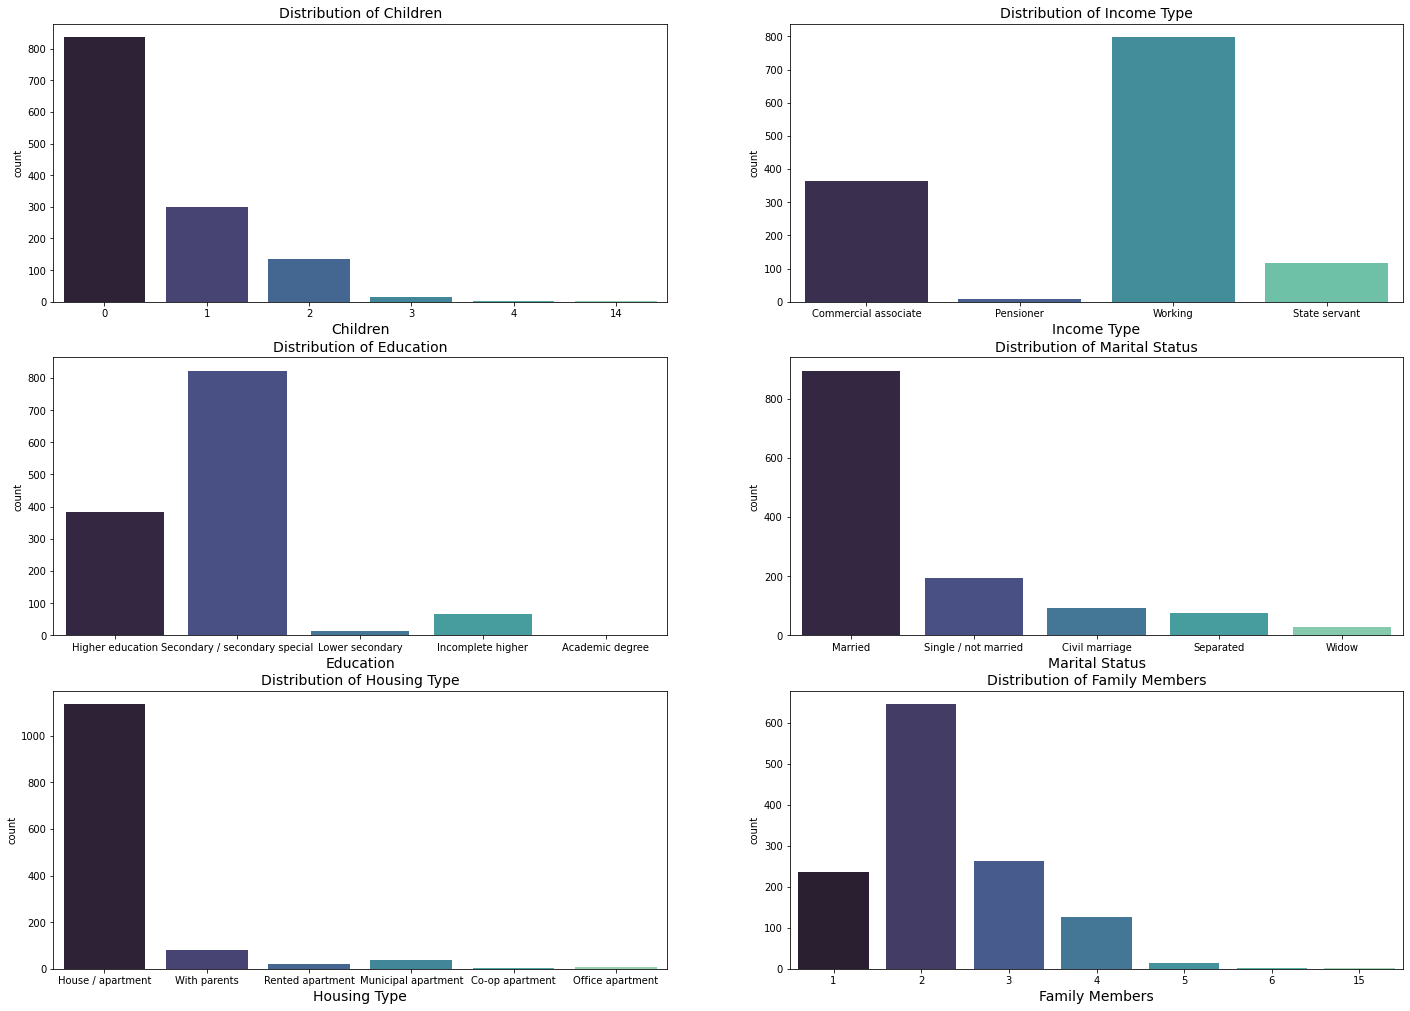

In [217]:
plt.figure(figsize=(10, 15))

plt.subplot(3,2,1)
sns.countplot(x='Children', data = dataset, palette = 'mako')
plt.xlabel('Children', fontsize = 14)
plt.title('Distribution of Children', fontsize = 14)

plt.subplot(3,2,2)
sns.countplot(x='Income_Type', data = dataset, palette = 'mako')
plt.xlabel('Income Type', fontsize = 14)
plt.title('Distribution of Income Type', fontsize = 14)

plt.subplot(3,2,3)
sns.countplot(x='Education', data = dataset, palette = 'mako')
plt.xlabel('Education', fontsize = 14)
plt.title('Distribution of Education', fontsize = 14)

plt.subplot(3,2,4)
sns.countplot(x='Marital_Status', data = dataset, palette = 'mako')
plt.xlabel('Marital Status', fontsize = 14)
plt.title('Distribution of Marital Status', fontsize = 14)

plt.subplot(3,2,5)
sns.countplot(x='Housing_Type', data = dataset, palette = 'mako')
plt.xlabel('Housing Type', fontsize = 14)
plt.title('Distribution of Housing Type', fontsize = 14)

plt.subplot(3,2,6)
sns.countplot(x='Family_Members', data = dataset, palette = 'mako')
plt.xlabel('Family Members', fontsize = 14)
plt.title('Distribution of Family Members', fontsize = 14)

plt.subplots_adjust(right=2.0, top = 1)
plt.show()

1. The majority of the applicants do not have children and have an income type of Working.
2. Majority of the applicants completed Secondary/secondary special Education and very few numbers of the applicants have completed the Academic degree.
3. The highest number of applicants are married, followed by single/not married applicants. Widowed applicants represent the smallest group.
4. The highest number of applicants are people who are living in their own house or apartment.
5. Majority of the applicants have 2 family members in their house.

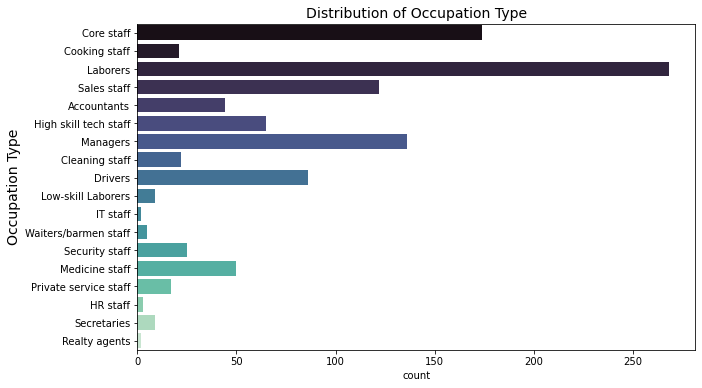

In [218]:
plt.figure(figsize = (10,6))
sns.countplot(y='Occupation_Type', data = dataset, palette = 'mako')
plt.ylabel('Occupation Type', fontsize = 14)
plt.title('Distribution of Occupation Type', fontsize = 14)
plt.show()

The highest number of applicants works as Laborers, followed by core staff. IT staff and Reality agents are the least.

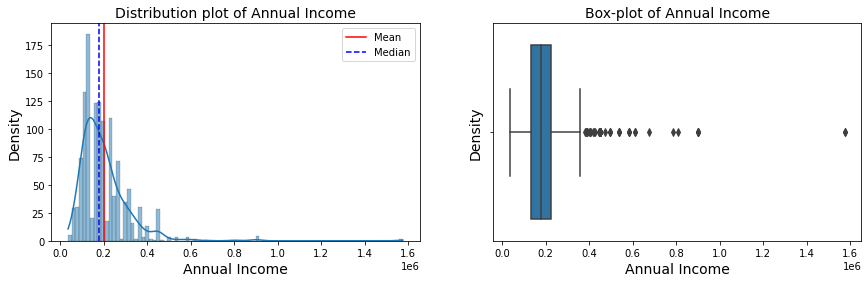

In [219]:
plt.subplot(1,2,1)
sns.histplot(data = dataset['Annual_Income'], kde = True)
plt.axvline(x=dataset.Annual_Income.mean(),color='red',label='Mean')
plt.axvline(x=dataset.Annual_Income.median(),c='blue',ls='--',label='Median')
plt.legend()
plt.xlabel('Annual Income', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('Distribution plot of Annual Income', fontsize = 14)

plt.subplot(1,2,2)
sns.boxplot(data=dataset, x='Annual_Income')
plt.xlabel('Annual Income', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('Box-plot of Annual Income', fontsize = 14)

plt.subplots_adjust(right=2.0)
plt.show()

There are outliers in Annual Income feature and the distribution is right-skewed.

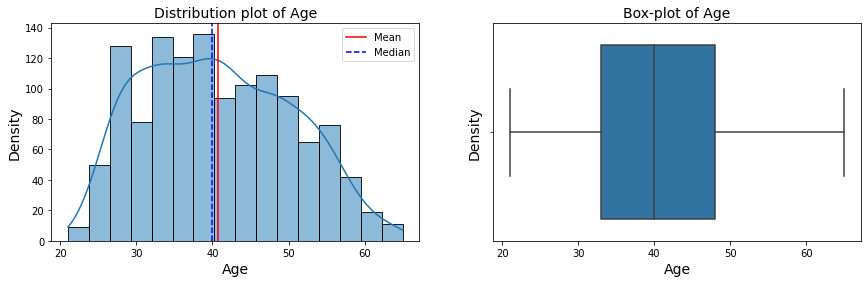

In [220]:
plt.subplot(1,2,1)
sns.histplot(data = dataset['Age'], kde = True)
plt.axvline(x=dataset.Age.mean(),color='red',label='Mean')
plt.axvline(x=dataset.Age.median(),c='blue',ls='--',label='Median')
plt.legend()
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('Distribution plot of Age', fontsize = 14)

plt.subplot(1,2,2)
sns.boxplot(data=dataset, x='Age')
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('Box-plot of Age', fontsize = 14)

plt.subplots_adjust(right=2.0)
plt.show()

The Age feature exhibits a nearly normal distribution and lacks outliers, indicating a relatively balanced and consistent distribution of ages in the dataset.

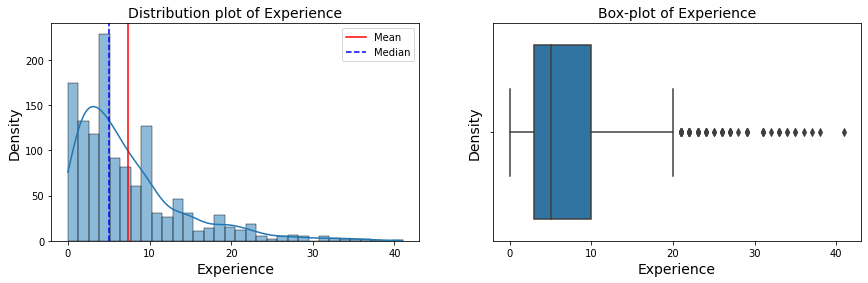

In [221]:
plt.subplot(1,2,1)
sns.histplot(data = dataset['Experience'], kde = True)
plt.axvline(x=dataset.Experience.mean(),color='red',label='Mean')
plt.axvline(x=dataset.Experience.median(),c='blue',ls='--',label='Median')
plt.legend()
plt.xlabel('Experience', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('Distribution plot of Experience', fontsize = 14)

plt.subplot(1,2,2)
sns.boxplot(data=dataset, x='Experience')
plt.xlabel('Experience', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('Box-plot of Experience', fontsize = 14)

plt.subplots_adjust(right=2.0)
plt.show()

There are values in the Experience feature that are significantly different from the majority of the data points, and the distribution of this feature is skewed to the right, indicating a tail that extends more to the right than to the left, which indicating that it has outliers.

#### Bivariate Analysis

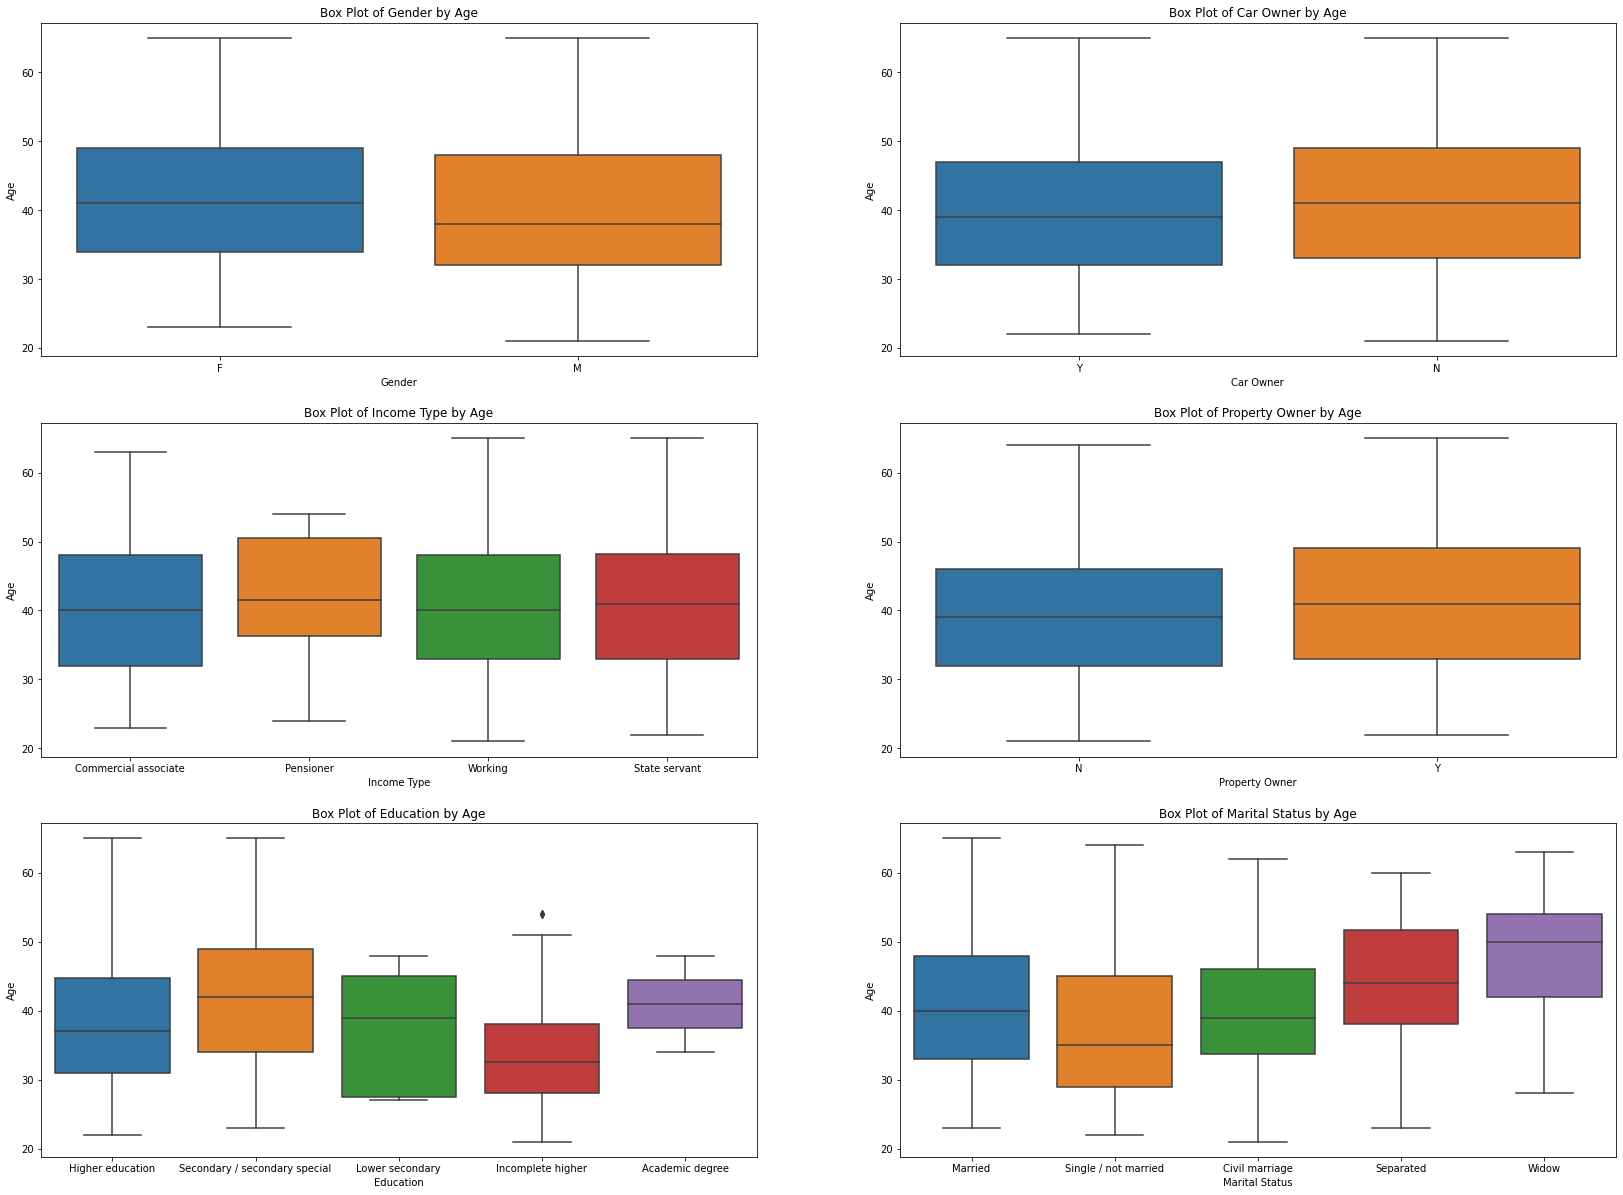

In [222]:
plt.figure(figsize=(25, 18))  
plt.subplot(3,2,1)
sns.boxplot(data=dataset, x='Gender', y='Age')
plt.title('Box Plot of Gender by Age')
plt.xlabel('Gender')
plt.ylabel('Age')

plt.subplot(3,2,2)
sns.boxplot(data=dataset, x='Car_Owner', y='Age')
plt.title('Box Plot of Car Owner by Age')
plt.xlabel('Car Owner')
plt.ylabel('Age')

plt.subplot(3,2,3)
sns.boxplot(data=dataset, x='Income_Type', y='Age')
plt.title('Box Plot of Income Type by Age')
plt.xlabel('Income Type')
plt.ylabel('Age')

plt.subplot(3,2,4)
sns.boxplot(data=dataset, x='Property_Owner', y='Age')
plt.title('Box Plot of Property Owner by Age')
plt.xlabel('Property Owner')
plt.ylabel('Age')

plt.subplot(3,2,5)
sns.boxplot(data=dataset, x='Education', y='Age')
plt.title('Box Plot of Education by Age')
plt.xlabel('Education')
plt.ylabel('Age')

plt.subplot(3,2,6)
sns.boxplot(data=dataset, x='Marital_Status', y='Age')
plt.title('Box Plot of Marital Status by Age')
plt.xlabel('Marital Status')
plt.ylabel('Age')

plt.subplots_adjust(right=1.0, top = 1.0)
plt.show()

1. Female applicants are generally older.
2. Younger applicants are more likely to purchase a car.
3. Individuals receiving pensions tend to be older.
4. Property owners are typically older than those without property.
5. Completion of secondary special education is associated with higher age.
6. Widowed applicants are generally older.

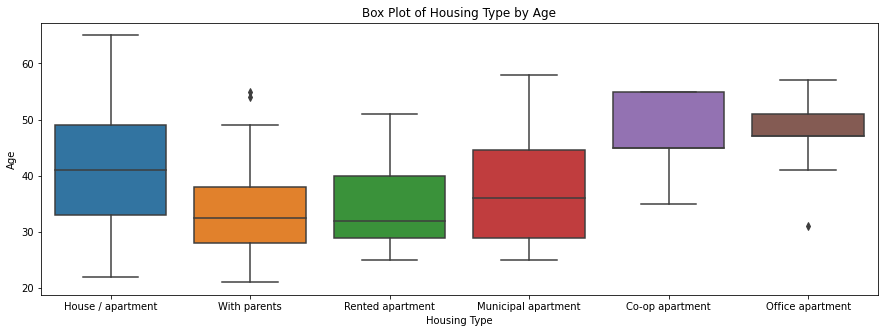

In [223]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=dataset, x='Housing_Type', y='Age')
plt.title('Box Plot of Housing Type by Age')
plt.xlabel('Housing Type')
plt.ylabel('Age')
plt.show()

Applicants who are living in office apartments tend to be older.

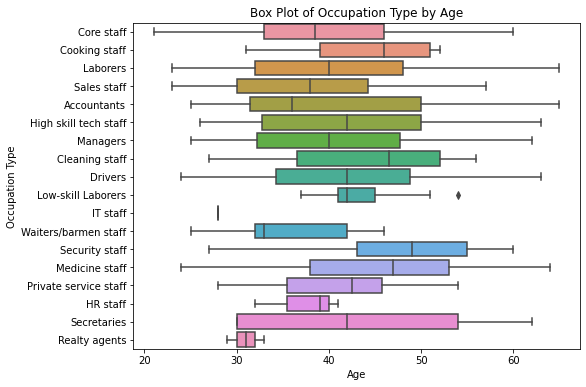

In [224]:
plt.figure(figsize=(8, 6))  
sns.boxplot(data=dataset, x='Age', y='Occupation_Type')
plt.title('Box Plot of Occupation Type by Age')
plt.xlabel('Age')
plt.ylabel('Occupation Type')
plt.show()

The age of people who are working as security staff is more. Reality agents are younger than others.

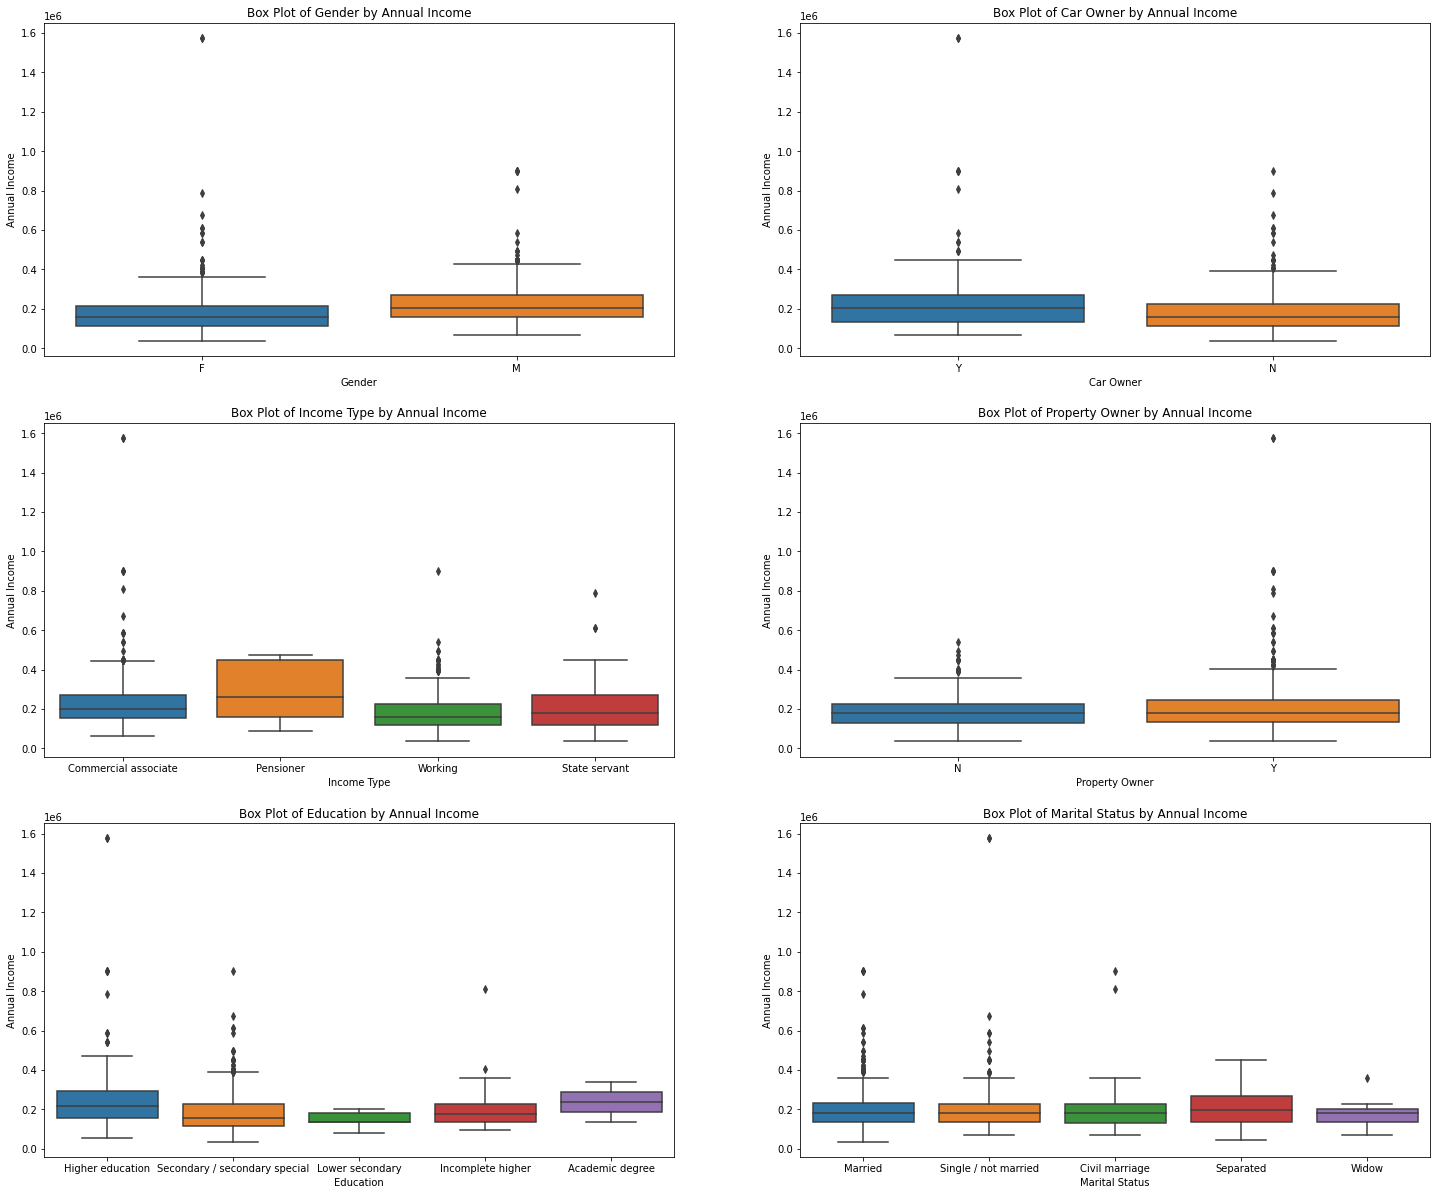

In [225]:
plt.figure(figsize=(22, 18))  
plt.subplot(3,2,1)
sns.boxplot(data=dataset, x='Gender', y='Annual_Income')
plt.title('Box Plot of Gender by Annual Income')
plt.xlabel('Gender')
plt.ylabel('Annual Income')

plt.subplot(3,2,2)
sns.boxplot(data=dataset, x='Car_Owner', y='Annual_Income')
plt.title('Box Plot of Car Owner by Annual Income')
plt.xlabel('Car Owner')
plt.ylabel('Annual Income')

plt.subplot(3,2,3)
sns.boxplot(data=dataset, x='Income_Type', y='Annual_Income')
plt.title('Box Plot of Income Type by Annual Income')
plt.xlabel('Income Type')
plt.ylabel('Annual Income')

plt.subplot(3,2,4)
sns.boxplot(data=dataset, x='Property_Owner', y='Annual_Income')
plt.title('Box Plot of Property Owner by Annual Income')
plt.xlabel('Property Owner')
plt.ylabel('Annual Income')

plt.subplot(3,2,5)
sns.boxplot(data=dataset, x='Education', y='Annual_Income')
plt.title('Box Plot of Education by Annual Income')
plt.xlabel('Education')
plt.ylabel('Annual Income')

plt.subplot(3,2,6)
sns.boxplot(data=dataset, x='Marital_Status', y='Annual_Income')
plt.title('Box Plot of Marital Status by Annual Income')
plt.xlabel('Marital Status')
plt.ylabel('Annual Income')

plt.subplots_adjust(right=1.0, top = 1.0)
plt.show()

1. Male applicants generally have higher income compared to female applicants.
2. Higher income applicants are more likely to own a car.
3. Individuals receiving pensions tend to have higher annual income.
4. Both property owners and non-property owners have similar average income, while those with academic degrees tend to have higher annual income.
5. Marital status does not significantly impact annual income.

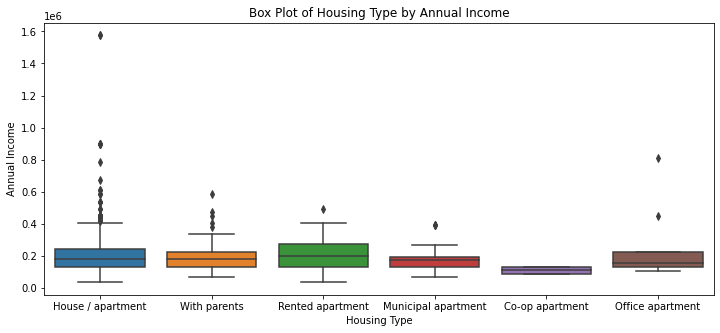

In [226]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=dataset, x='Housing_Type', y='Annual_Income')
plt.title('Box Plot of Housing Type by Annual Income')
plt.xlabel('Housing Type')
plt.ylabel('Annual Income')
plt.show()

The applicants who are living in rented apartments have more average annual income and on the other hand, people who are living in co-op apartments have lowest average annual income.

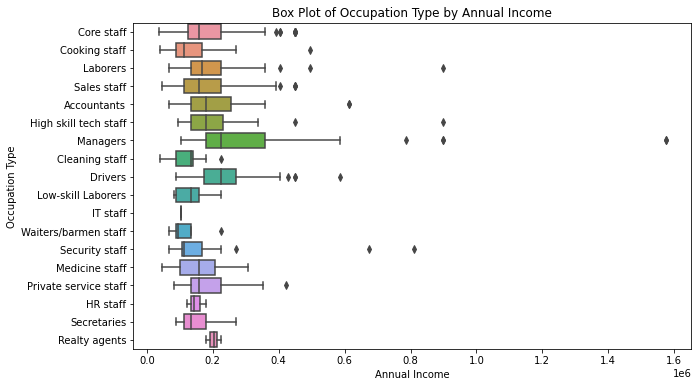

In [227]:
plt.figure(figsize=(10, 6))  
sns.boxplot(data=dataset, x='Annual_Income', y='Occupation_Type')
plt.title('Box Plot of Occupation Type by Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Occupation Type')
plt.show()

Individuals working as managers and drivers tend to earn higher annual income.

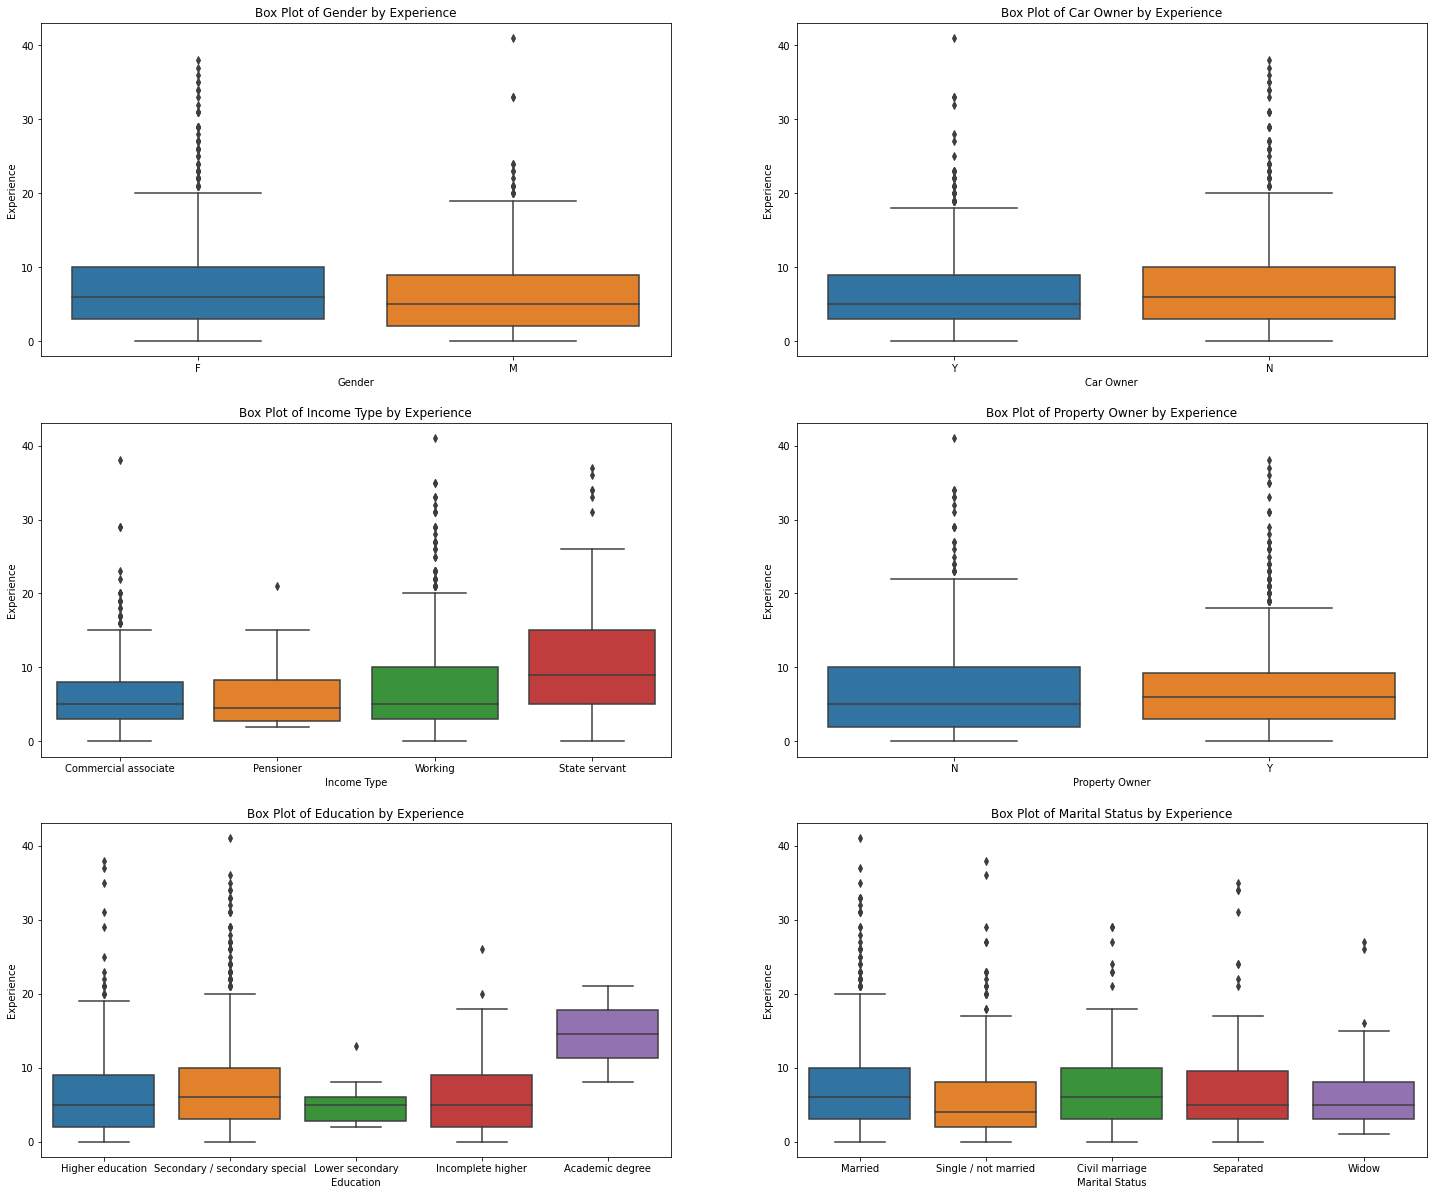

In [228]:
plt.figure(figsize=(22, 18))  
plt.subplot(3,2,1)
sns.boxplot(data=dataset, x='Gender', y='Experience')
plt.title('Box Plot of Gender by Experience')
plt.xlabel('Gender')
plt.ylabel('Experience')

plt.subplot(3,2,2)
sns.boxplot(data=dataset, x='Car_Owner', y='Experience')
plt.title('Box Plot of Car Owner by Experience')
plt.xlabel('Car Owner')
plt.ylabel('Experience')

plt.subplot(3,2,3)
sns.boxplot(data=dataset, x='Income_Type', y='Experience')
plt.title('Box Plot of Income Type by Experience')
plt.xlabel('Income Type')
plt.ylabel('Experience')

plt.subplot(3,2,4)
sns.boxplot(data=dataset, x='Property_Owner', y='Experience')
plt.title('Box Plot of Property Owner by Experience')
plt.xlabel('Property Owner')
plt.ylabel('Experience')

plt.subplot(3,2,5)
sns.boxplot(data=dataset, x='Education', y='Experience')
plt.title('Box Plot of Education by Experience')
plt.xlabel('Education')
plt.ylabel('Experience')

plt.subplot(3,2,6)
sns.boxplot(data=dataset, x='Marital_Status', y='Experience')
plt.title('Box Plot of Marital Status by Experience')
plt.xlabel('Marital Status')
plt.ylabel('Experience')

plt.subplots_adjust(right=1.0, top = 1.0)
plt.show()

1. The experience of male and female is almost similar.
2. The experience of applicants who has car and do not has a car is also similar.
3. People who are working as state servants are more experienced.
4. Applicants who completed their academic degree are more experienced.
5. People with marital status as Married and Civil marriage has almost same experience.

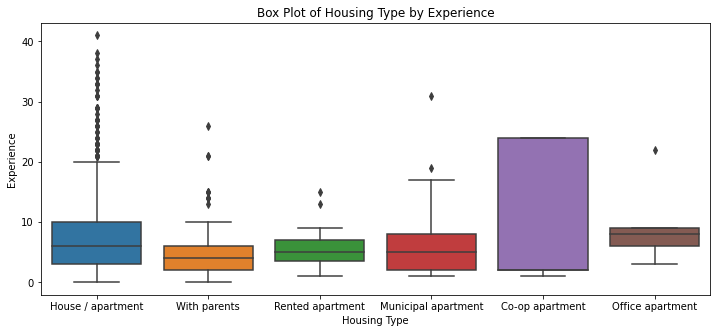

In [229]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=dataset, x='Housing_Type', y='Experience')
plt.title('Box Plot of Housing Type by Experience')
plt.xlabel('Housing Type')
plt.ylabel('Experience')
plt.show()

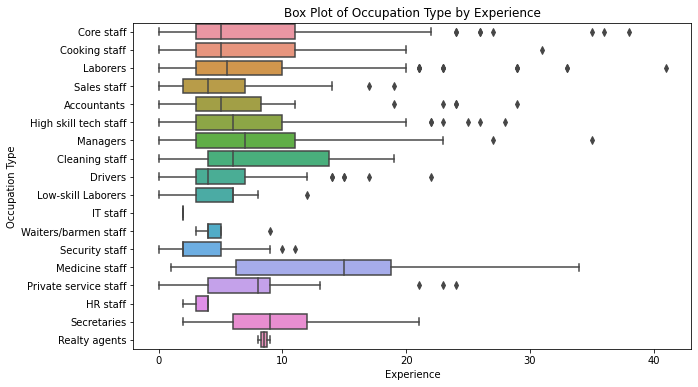

In [230]:
plt.figure(figsize=(10, 6))  
sns.boxplot(data=dataset, x='Experience', y='Occupation_Type')
plt.title('Box Plot of Occupation Type by Experience')
plt.xlabel('Experience')
plt.ylabel('Occupation Type')
plt.show()

People who are working as Medicine staff has more experience.

#### Correlation between the features

In [231]:
correlation = dataset.corr()
correlation

,Ind_id,Children,Annual_Income,Mobile_Phone,Work_Phone,Phone,Email_id,Family_Members,label,Age,Experience
Ind_id,1.000000,0.017917,0.025383,NaN,0.082469,0.014108,-0.044210,0.003541,0.000535,0.012222,-0.016595
Children,0.017917,1.000000,0.049350,NaN,-0.016597,-0.008798,-0.000127,0.903850,-0.013725,-0.180356,-0.020142
Annual_Income,0.025383,0.049350,1.000000,NaN,-0.117991,-0.002448,0.110452,0.023836,0.043792,-0.007726,-0.017495
Mobile_Phone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Work_Phone,0.082469,-0.016597,-0.117991,NaN,1.000000,0.396304,-0.039169,0.018706,-0.000157,-0.041773,0.027742
Phone,0.014108,-0.008798,-0.002448,NaN,0.396304,1.000000,0.015733,0.010152,0.014011,0.047864,0.040475
Email_id,-0.044210,-0.000127,0.110452,NaN,-0.039169,0.015733,1.000000,0.006118,0.015112,-0.121977,-0.097478
Family_Members,0.003541,0.903850,0.023836,NaN,0.018706,0.010152,0.006118,1.000000,-0.030345,-0.141713,-0.007679
label,0.000535,-0.013725,0.043792,NaN,-0.000157,0.014011,0.015112,-0.030345,1.000000,0.023041,-0.101461
Age,0.012222,-0.180356,-0.007726,NaN,-0.041773,0.047864,-0.121977,-0.141713,0.023041,1.000000,0.339592


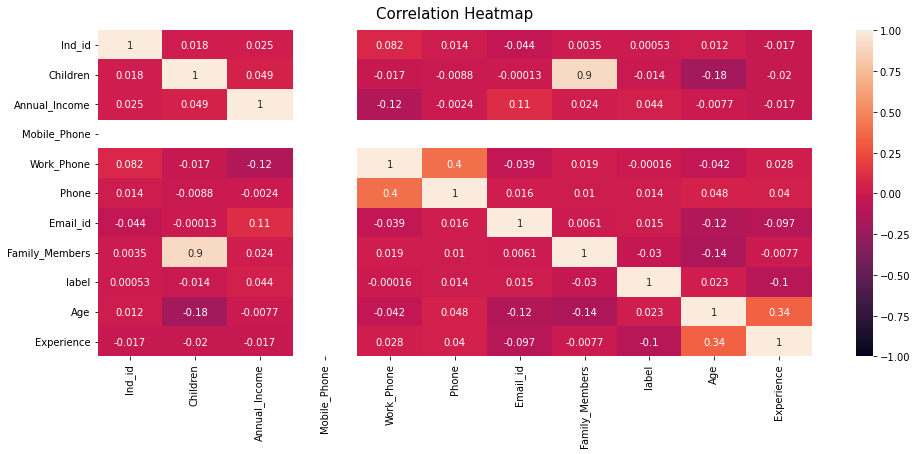

In [232]:
# plot the heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=12);

The Correlation between Children and Family members is 0.9, which means there is a positive correlation between these two features. More number of children results in more members in the family, so we can drop one of these features.

#### Dealing with Missing Values

In [233]:
dataset.isnull().sum()

Ind_id               0
Gender               6
Car_Owner            0
Property_Owner       0
Children             0
Annual_Income       19
Income_Type          0
Education            0
Marital_Status       0
Housing_Type         0
Mobile_Phone         0
Work_Phone           0
Phone                0
Email_id             0
Occupation_Type    227
Family_Members       0
label                0
Age                 18
Experience           0
dtype: int64

There are missing values in the Gender, Annual_Income, Birthday_Count, and Occupation_Type columns.

In [234]:
round(dataset.isnull().mean()*100, 2)

Ind_id              0.00
Gender              0.47
Car_Owner           0.00
Property_Owner      0.00
Children            0.00
Annual_Income       1.48
Income_Type         0.00
Education           0.00
Marital_Status      0.00
Housing_Type        0.00
Mobile_Phone        0.00
Work_Phone          0.00
Phone               0.00
Email_id            0.00
Occupation_Type    17.64
Family_Members      0.00
label               0.00
Age                 1.40
Experience          0.00
dtype: float64

Gender, Annual_Income, Occupation_Type, and Age have missing values of 0.47%, 1.48%, 17.64%, and 1.40% respectively.

<AxesSubplot:>

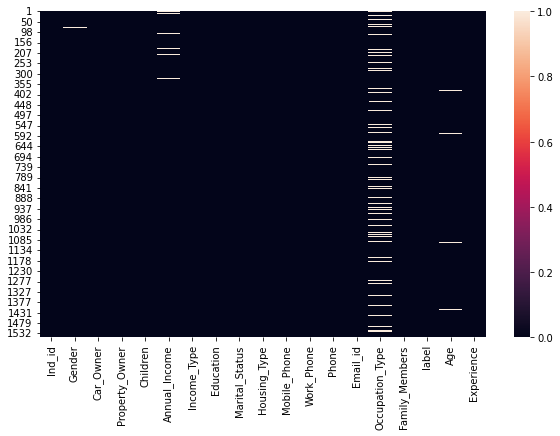

In [235]:
# visualising the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.isnull())

In [236]:
missing_dataset = dataset.copy()

In [237]:
missing_dataset.shape

(1287, 19)

##### Gender

In [238]:
missing_dataset['Gender'].isnull().sum()

6

The Gender column has 6 missing values.

In [239]:
Gender_NaN = missing_dataset[missing_dataset['Gender'].isna()==True]
Gender_NaN

,Ind_id,Gender,Car_Owner,Property_Owner,Children,Annual_Income,Income_Type,Education,Marital_Status,Housing_Type,Mobile_Phone,Work_Phone,Phone,Email_id,Occupation_Type,Family_Members,label,Age,Experience
5,5009753,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.0,2.0
28,5025127,NaN,N,Y,0,292500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,High skill tech staff,2,1,30.0,9.0
82,5068651,NaN,Y,Y,0,360000.0,State servant,Higher education,Separated,House / apartment,1,0,0,0,Core staff,1,1,53.0,5.0
171,5149192,NaN,Y,N,1,450000.0,Working,Higher education,Married,House / apartment,1,0,1,1,Core staff,3,1,27.0,1.0
188,5054058,NaN,Y,N,1,450000.0,Working,Higher education,Married,House / apartment,1,0,1,0,Managers,3,0,41.0,13.0
240,5028615,NaN,Y,Y,0,225000.0,Commercial associate,Higher education,Single / not married,With parents,1,0,1,0,Sales staff,1,0,29.0,6.0


In [240]:
mean_age = missing_dataset.groupby("Gender")['Age'].mean()
mean_age

mean_age_M = mean_age.loc['M']
mean_age_F = mean_age.loc['F']

print(f"Mean Age of Males: {mean_age_M}")
print(f"Mean Age of Females: {mean_age_F}")

Mean Age of Males: 39.59649122807018
Mean Age of Females: 41.49333333333333


From EDA, we found that the age of female applicants is higher than that of males. Therefore, we computed the missing gender values based on their respective mean ages.

In [241]:
# Define a function to impute missing 'Gender' values based on 'Age'
def impute_gender(row):
    if pd.isna(row['Gender']):
        if row['Age'] > mean_age_F:
            return 'F'
        else:
            return 'M'
    return row['Gender']

# Apply the impute_gender function to the 'Gender' column
Gender_NaN['Gender'] = Gender_NaN.apply(impute_gender, axis=1)

For each row where Gender was initially missing, the above function evaluates the Age value. If the Age is greater than the mean age of Females, it imputes F (female); otherwise, it imputes M (male).

In [242]:
Gender_NaN

,Ind_id,Gender,Car_Owner,Property_Owner,Children,Annual_Income,Income_Type,Education,Marital_Status,Housing_Type,Mobile_Phone,Work_Phone,Phone,Email_id,Occupation_Type,Family_Members,label,Age,Experience
5,5009753,M,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.0,2.0
28,5025127,M,N,Y,0,292500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,High skill tech staff,2,1,30.0,9.0
82,5068651,F,Y,Y,0,360000.0,State servant,Higher education,Separated,House / apartment,1,0,0,0,Core staff,1,1,53.0,5.0
171,5149192,M,Y,N,1,450000.0,Working,Higher education,Married,House / apartment,1,0,1,1,Core staff,3,1,27.0,1.0
188,5054058,M,Y,N,1,450000.0,Working,Higher education,Married,House / apartment,1,0,1,0,Managers,3,0,41.0,13.0
240,5028615,M,Y,Y,0,225000.0,Commercial associate,Higher education,Single / not married,With parents,1,0,1,0,Sales staff,1,0,29.0,6.0


In [243]:
missing_dataset[missing_dataset['Gender'].isna()==True]=Gender_NaN

mean_age = missing_dataset.groupby("Gender")['Age'].mean()
mean_age

mean_age_M = mean_age.loc['M']
mean_age_F = mean_age.loc['F']

print(f"Mean Age of Males: {mean_age_M}")
print(f"Mean Age of Females: {mean_age_F}")

After evaluating the missing values of the Gender feature and imputing them, there was no change in the mean age of males and females.

In [244]:
missing_dataset['Gender'].isnull().sum()

0

The Gender column no longer contains any missing values.

##### Annual Income

In [245]:
missing_dataset['Annual_Income'].isnull().sum()

19

The Annual_Income column has 19 missing values

In [246]:
Income_NaN = missing_dataset[missing_dataset['Annual_Income'].isna()==True]
Income_NaN

,Ind_id,Gender,Car_Owner,Property_Owner,Children,Annual_Income,Income_Type,Education,Marital_Status,Housing_Type,Mobile_Phone,Work_Phone,Phone,Email_id,Occupation_Type,Family_Members,label,Age,Experience
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.0,2.0
12,5018501,F,Y,Y,0,NaN,Working,Secondary / secondary special,Married,House / apartment,1,1,1,0,Cooking staff,2,1,52.0,3.0
76,5062137,M,N,Y,1,NaN,Working,Secondary / secondary special,Single / not married,House / apartment,1,0,0,0,Laborers,2,1,35.0,0.0
107,5105056,M,Y,N,0,NaN,Commercial associate,Higher education,Single / not married,Municipal apartment,1,0,1,1,High skill tech staff,1,1,32.0,2.0
152,5142183,M,Y,Y,2,NaN,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Managers,4,1,49.0,12.0
185,5033574,F,Y,Y,1,NaN,Working,Secondary / secondary special,Married,House / apartment,1,1,1,0,Cooking staff,3,0,39.0,0.0
215,5085769,F,N,Y,0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,0,Cleaning staff,2,0,53.0,4.0
273,5047704,F,N,Y,2,NaN,Working,Secondary / secondary special,Single / not married,House / apartment,1,0,0,0,NaN,3,0,40.0,4.0
324,5069227,F,Y,Y,0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,1,0,Sales staff,2,0,47.0,3.0
381,5021682,M,N,Y,0,NaN,Commercial associate,Secondary / secondary special,Separated,House / apartment,1,0,0,0,Cleaning staff,1,0,51.0,10.0


In [247]:
mean_income = missing_dataset.groupby('Income_Type')['Annual_Income'].mean()
mean_income

Income_Type
Commercial associate    234600.000000
Pensioner               288000.000000
State servant           211422.413793
Working                 181048.757306
Name: Annual_Income, dtype: float64

For the Income_Type as Commercial associate, Pensioner, State servant, and Working, the mean Annual_Income is 234600, 288000, 211422, and 181048, respectively.

In [248]:
# Define a function to impute missing 'Annual_income' values based on 'Income_type'
def impute_income(row):
    if pd.isna(row['Annual_Income']):
        if row['Income_Type'] in mean_income:
            return mean_income[row['Income_Type']]
    return row['Annual_Income']

# Apply the impute_income function to the 'Annual_income' column
Income_NaN['Annual_Income'] = Income_NaN.apply(impute_income, axis=1)

For each row where Annual_Income was initially missing, the above function checks if the Income_Type is present in the mean_income dictionary. If it is, the missing Annual_Income value is replaced with the mean income corresponding to that Income_Type.

In [249]:
Income_NaN

,Ind_id,Gender,Car_Owner,Property_Owner,Children,Annual_Income,Income_Type,Education,Marital_Status,Housing_Type,Mobile_Phone,Work_Phone,Phone,Email_id,Occupation_Type,Family_Members,label,Age,Experience
3,5009749,F,Y,N,0,234600.000000,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.0,2.0
12,5018501,F,Y,Y,0,181048.757306,Working,Secondary / secondary special,Married,House / apartment,1,1,1,0,Cooking staff,2,1,52.0,3.0
76,5062137,M,N,Y,1,181048.757306,Working,Secondary / secondary special,Single / not married,House / apartment,1,0,0,0,Laborers,2,1,35.0,0.0
107,5105056,M,Y,N,0,234600.000000,Commercial associate,Higher education,Single / not married,Municipal apartment,1,0,1,1,High skill tech staff,1,1,32.0,2.0
152,5142183,M,Y,Y,2,234600.000000,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Managers,4,1,49.0,12.0
185,5033574,F,Y,Y,1,181048.757306,Working,Secondary / secondary special,Married,House / apartment,1,1,1,0,Cooking staff,3,0,39.0,0.0
215,5085769,F,N,Y,0,234600.000000,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,0,Cleaning staff,2,0,53.0,4.0
273,5047704,F,N,Y,2,181048.757306,Working,Secondary / secondary special,Single / not married,House / apartment,1,0,0,0,NaN,3,0,40.0,4.0
324,5069227,F,Y,Y,0,234600.000000,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,1,0,Sales staff,2,0,47.0,3.0
381,5021682,M,N,Y,0,234600.000000,Commercial associate,Secondary / secondary special,Separated,House / apartment,1,0,0,0,Cleaning staff,1,0,51.0,10.0


In [250]:
missing_dataset[missing_dataset['Annual_Income'].isna()==True]=Income_NaN

In [251]:
mean_income = missing_dataset.groupby('Income_Type')['Annual_Income'].mean()
mean_income

Income_Type
Commercial associate    234600.000000
Pensioner               288000.000000
State servant           211422.413793
Working                 181048.757306
Name: Annual_Income, dtype: float64

After evaluating the missing values of the Annual_Income feature and imputing them, there was no change in the mean Annual_Income of each Income_Type.

In [252]:
missing_dataset['Annual_Income'].isnull().sum()

0

There is no more any missing value in Annual_Income column.

##### Age

In [253]:
missing_dataset['Age'].isnull().sum()

18

The Age column has 18 missing values.

In [254]:
Age_NaN = missing_dataset[missing_dataset['Age'].isna()==True]
Age_NaN

,Ind_id,Gender,Car_Owner,Property_Owner,Children,Annual_Income,Income_Type,Education,Marital_Status,Housing_Type,Mobile_Phone,Work_Phone,Phone,Email_id,Occupation_Type,Family_Members,label,Age,Experience
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,NaN,2.0
70,5058532,M,N,N,0,391500.0,Working,Secondary / secondary special,Single / not married,Municipal apartment,1,0,0,0,Sales staff,1,1,NaN,1.0
205,5066627,M,Y,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,NaN,2,0,NaN,2.0
388,5095193,M,Y,Y,1,495000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,1,0,Managers,3,0,NaN,3.0
473,5054699,M,Y,Y,0,157500.0,Working,Higher education,Married,House / apartment,1,0,0,0,Laborers,2,0,NaN,19.0
503,5132264,F,N,N,0,144000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,1,0,Laborers,2,0,NaN,6.0
539,5065820,M,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Laborers,3,0,NaN,6.0
584,5105743,M,Y,N,2,112500.0,Working,Higher education,Married,House / apartment,1,1,1,0,High skill tech staff,4,0,NaN,18.0
626,5029191,F,N,Y,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Sales staff,2,0,NaN,8.0
743,5117561,F,N,N,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,1,1,0,0,Laborers,2,0,NaN,2.0


In [255]:
mean_Age = missing_dataset.groupby('Income_Type')['Age'].mean()
mean_Age

Income_Type
Commercial associate    40.226519
Pensioner               41.750000
State servant           41.508621
Working                 40.790549
Name: Age, dtype: float64

For the Income_Type as Commercial associate, Pensioner, State servant, and Working, the mean Age is 40.23, 41.75, 41.51, and 40.79, respectively.

In [256]:
# Define a function to impute missing 'Annual_income' values based on 'Income_type'
def impute_Age(row):
    if pd.isna(row['Age']):
        if row['Income_Type'] in mean_Age:
            return mean_Age[row['Income_Type']]
    return row['Age']

# Apply the impute_income function to the 'Annual_income' column
Age_NaN['Age'] = Age_NaN.apply(impute_Age, axis=1)

For each row where Age was initially missing, the above function checks if the Income_Type is present in the mean_Age dictionary. If it is, the missing Age value is replaced with the mean age corresponding to that Income_Type.

In [257]:
Age_NaN

,Ind_id,Gender,Car_Owner,Property_Owner,Children,Annual_Income,Income_Type,Education,Marital_Status,Housing_Type,Mobile_Phone,Work_Phone,Phone,Email_id,Occupation_Type,Family_Members,label,Age,Experience
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,40.226519,2.0
70,5058532,M,N,N,0,391500.0,Working,Secondary / secondary special,Single / not married,Municipal apartment,1,0,0,0,Sales staff,1,1,40.790549,1.0
205,5066627,M,Y,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,NaN,2,0,40.790549,2.0
388,5095193,M,Y,Y,1,495000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,1,0,Managers,3,0,40.226519,3.0
473,5054699,M,Y,Y,0,157500.0,Working,Higher education,Married,House / apartment,1,0,0,0,Laborers,2,0,40.790549,19.0
503,5132264,F,N,N,0,144000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,1,0,Laborers,2,0,40.790549,6.0
539,5065820,M,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Laborers,3,0,40.790549,6.0
584,5105743,M,Y,N,2,112500.0,Working,Higher education,Married,House / apartment,1,1,1,0,High skill tech staff,4,0,40.790549,18.0
626,5029191,F,N,Y,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Sales staff,2,0,40.790549,8.0
743,5117561,F,N,N,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,1,1,0,0,Laborers,2,0,40.790549,2.0


In [258]:
missing_dataset[missing_dataset['Age'].isna()==True]=Age_NaN

In [259]:
mean_Age = missing_dataset.groupby('Income_Type')['Age'].mean()
mean_Age

Income_Type
Commercial associate    40.226519
Pensioner               41.750000
State servant           41.508621
Working                 40.790549
Name: Age, dtype: float64

After evaluating the missing values of the Age feature and imputing them, there was no change in the mean Age of each Income_Type.

In [260]:
missing_dataset['Age'].isnull().sum()

0

There is no more any missing value in Age column.

##### Occupation Type

In [261]:
missing_dataset['Occupation_Type'].isnull().sum()

227

The Occupation_Type column has 227 missing values.

In [262]:
Occupation_NaN=missing_dataset[missing_dataset['Occupation_Type'].isna()==True]

In [263]:
cross_tab = pd.crosstab(missing_dataset['Income_Type'], missing_dataset['Occupation_Type'])
cross_tab

Occupation_Type,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
Income_Type,,,,,,,,,,,,,,,,,,
Commercial associate,17,3,2,36,22,0,21,0,54,3,53,9,7,2,47,2,7,3
Pensioner,0,0,0,2,0,0,0,0,0,1,1,1,0,0,0,0,0,0
State servant,5,0,1,36,4,0,8,0,9,0,14,17,2,0,0,2,0,0
Working,22,19,18,100,60,3,36,2,205,5,68,23,8,0,75,5,18,2


In [264]:
conditional_prob=cross_tab.div(cross_tab.sum(axis=1), axis=0)
conditional_prob

Occupation_Type,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
Income_Type,,,,,,,,,,,,,,,,,,
Commercial associate,0.059028,0.010417,0.006944,0.125000,0.076389,0.000000,0.072917,0.00000,0.187500,0.010417,0.184028,0.031250,0.024306,0.006944,0.163194,0.006944,0.024306,0.010417
Pensioner,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.00000,0.000000,0.200000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
State servant,0.051020,0.000000,0.010204,0.367347,0.040816,0.000000,0.081633,0.00000,0.091837,0.000000,0.142857,0.173469,0.020408,0.000000,0.000000,0.020408,0.000000,0.000000
Working,0.032885,0.028401,0.026906,0.149477,0.089686,0.004484,0.053812,0.00299,0.306428,0.007474,0.101644,0.034380,0.011958,0.000000,0.112108,0.007474,0.026906,0.002990


The above table is showing the probabilities represent the proportion of each Occupation_Type category within each Income_Type category (Ex: For Commercial associates, the probability of being an Accountants is 0.059, and the probability of being a Laborers is 0.187).

In [265]:
for index, row in Occupation_NaN[Occupation_NaN['Occupation_Type'].isnull()].iterrows():
    income_type = row['Income_Type']
    
    # Get conditional probabilities for the given 'Income_type'
    probabilities = conditional_prob.loc[income_type]
    
    # Impute 'Occupation_type' based on the probabilities
    Occupation_NaN.at[index, 'Occupation_Type'] = np.random.choice(probabilities.index, p=probabilities)

In the above code, we have imputed the missing Occupation_Type values based on the conditional probabilities derived from the relationship between Income_Type and Occupation_Type.

In [266]:
Occupation_NaN.head(10)

,Ind_id,Gender,Car_Owner,Property_Owner,Children,Annual_Income,Income_Type,Education,Marital_Status,Housing_Type,Mobile_Phone,Work_Phone,Phone,Email_id,Occupation_Type,Family_Members,label,Age,Experience
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Core staff,2,1,37.000000,2.0
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Medicine staff,2,1,40.226519,2.0
3,5009749,F,Y,N,0,234600.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Sales staff,2,1,37.000000,2.0
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,37.000000,2.0
5,5009753,M,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,1,1,1,0,Core staff,2,1,37.000000,2.0
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,37.000000,2.0
14,5021303,M,N,N,1,472500.0,Pensioner,Higher education,Married,With parents,1,0,0,1,Medicine staff,3,1,24.000000,3.0
19,5021998,M,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,0,1,Low-skill Laborers,2,1,52.000000,5.0
20,5022053,M,N,N,0,202500.0,Working,Higher education,Single / not married,House / apartment,1,0,0,0,Laborers,1,1,35.000000,12.0
25,5024213,F,Y,Y,0,540000.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,0,Managers,2,1,43.000000,1.0


In [267]:
missing_dataset[missing_dataset['Occupation_Type'].isna()==True]=Occupation_NaN

In [268]:
missing_dataset['Occupation_Type'].isna().sum()

0

There is no more any missing value in Occupation_Type column

In [269]:
missing_dataset.isna().sum()

Ind_id             0
Gender             0
Car_Owner          0
Property_Owner     0
Children           0
Annual_Income      0
Income_Type        0
Education          0
Marital_Status     0
Housing_Type       0
Mobile_Phone       0
Work_Phone         0
Phone              0
Email_id           0
Occupation_Type    0
Family_Members     0
label              0
Age                0
Experience         0
dtype: int64

The missing values in the dataset have been addressed and there are no remaining missing values.

### Dealing with Outliers

In [270]:
dataset_outliers=missing_dataset.copy()

In [271]:
dataset_outliers.shape

(1287, 19)

##### Annual Income

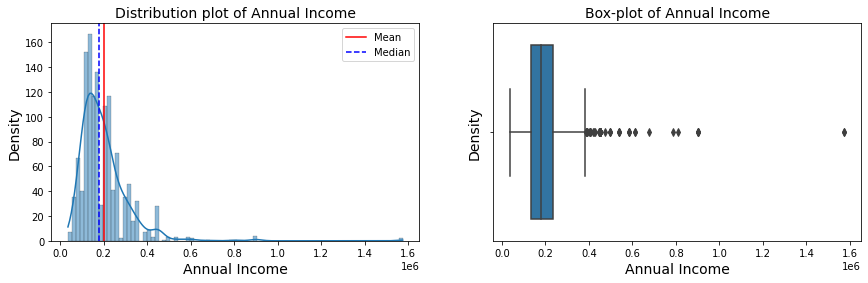

In [272]:
plt.subplot(1,2,1)
sns.histplot(data = dataset_outliers['Annual_Income'], kde = True)
plt.axvline(x=dataset_outliers.Annual_Income.mean(),color='red',label='Mean')
plt.axvline(x=dataset_outliers.Annual_Income.median(),c='blue',ls='--',label='Median')
plt.legend()
plt.xlabel('Annual Income', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('Distribution plot of Annual Income', fontsize = 14)

plt.subplot(1,2,2)
sns.boxplot(data=dataset_outliers, x='Annual_Income')
plt.xlabel('Annual Income', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('Box-plot of Annual Income', fontsize = 14)

plt.subplots_adjust(right=2.0)
plt.show()

In [273]:
Q1 = np.percentile(dataset_outliers['Annual_Income'], 25, interpolation = 'midpoint')
Q2 = np.percentile(dataset_outliers['Annual_Income'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(dataset_outliers['Annual_Income'], 75, interpolation = 'midpoint')

print('First Quarter (25%):',Q1)
print('Second Quarter (50%):',Q2)
print('Third Quarter (75%):',Q3)

First Quarter (25%): 135000.0
Second Quarter (50%): 180000.0
Third Quarter (75%): 234000.0


This output indicates that 25% of the data points have an Annual_Income less than or equal to 135000.0 (Q1), 50% have an Annual_Income less than or equal to 180000.0 (Q2, the median), and 75% have an Annual_Income less than or equal to 234000.0 (Q3).

In [274]:
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('Lower limit is', low_lim)
print('Upper limit is', up_lim)
outlier =[]
for x in dataset_outliers['Annual_Income']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print('Outlier in the Annual Income column is', outlier)

Interquartile range is 99000.0
Lower limit is -13500.0
Upper limit is 382500.0
Outlier in the Annual Income column is [450000.0, 450000.0, 450000.0, 472500.0, 540000.0, 540000.0, 450000.0, 391500.0, 391500.0, 391500.0, 675000.0, 585000.0, 585000.0, 450000.0, 450000.0, 450000.0, 450000.0, 450000.0, 450000.0, 445500.0, 1575000.0, 1575000.0, 900000.0, 450000.0, 423000.0, 450000.0, 540000.0, 450000.0, 495000.0, 612000.0, 427500.0, 612000.0, 450000.0, 787500.0, 450000.0, 585000.0, 495000.0, 387000.0, 450000.0, 900000.0, 450000.0, 900000.0, 405000.0, 405000.0, 445500.0, 450000.0, 450000.0, 405000.0, 900000.0, 450000.0, 418500.0, 450000.0, 405000.0, 405000.0, 405000.0, 495000.0, 450000.0, 387000.0, 810000.0, 391500.0, 405000.0, 450000.0, 405000.0, 450000.0, 450000.0, 405000.0, 450000.0]


In [275]:
print('Total Outliers in Annual Income column is', len(outlier))

Total Outliers in Annual Income column is 67


Total Outliers in Annual Income column is 67

In [276]:
dataset_outliers=dataset_outliers[dataset_outliers['Annual_Income']<up_lim]

We have removed the rows where Annual Income is exceeding the upper limit.

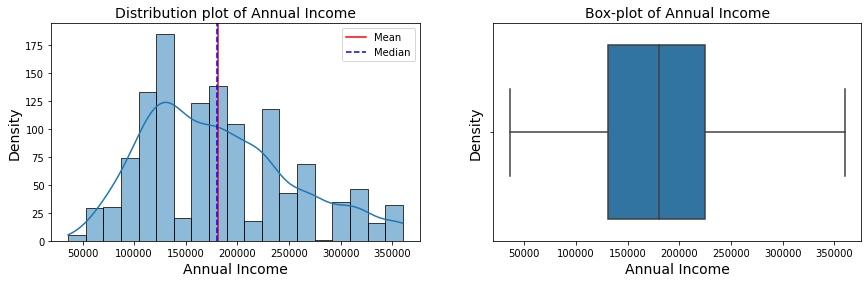

In [277]:
plt.subplot(1,2,1)
sns.histplot(data = dataset_outliers['Annual_Income'], kde = True)
plt.axvline(x=dataset_outliers.Annual_Income.mean(),color='red',label='Mean')
plt.axvline(x=dataset_outliers.Annual_Income.median(),c='blue',ls='--',label='Median')
plt.legend()
plt.xlabel('Annual Income', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('Distribution plot of Annual Income', fontsize = 14)

plt.subplot(1,2,2)
sns.boxplot(data=dataset_outliers, x='Annual_Income')
plt.xlabel('Annual Income', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('Box-plot of Annual Income', fontsize = 14)

plt.subplots_adjust(right=2.0)
plt.show()

There is no more any outlier present in Annual_Income feature.

##### Experience

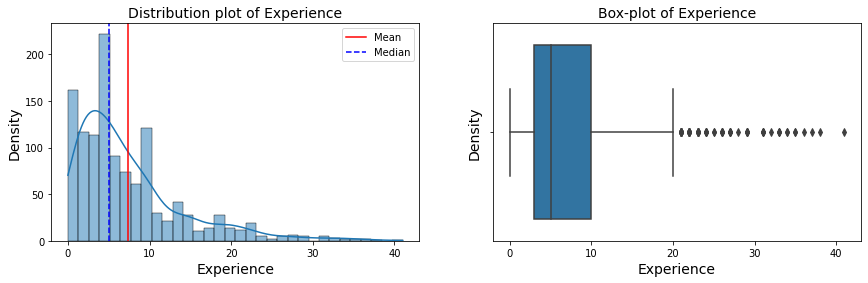

In [278]:
plt.subplot(1,2,1)
sns.histplot(data = dataset_outliers['Experience'], kde = True)
plt.axvline(x=dataset_outliers.Experience.mean(),color='red',label='Mean')
plt.axvline(x=dataset_outliers.Experience.median(),c='blue',ls='--',label='Median')
plt.legend()
plt.xlabel('Experience', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('Distribution plot of Experience', fontsize = 14)

plt.subplot(1,2,2)
sns.boxplot(data=dataset_outliers, x='Experience')
plt.xlabel('Experience', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('Box-plot of Experience', fontsize = 14)

plt.subplots_adjust(right=2.0)
plt.show()

In [279]:
Q1 = np.percentile(dataset_outliers['Experience'], 25, interpolation = 'midpoint')
Q2 = np.percentile(dataset_outliers['Experience'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(dataset_outliers['Experience'], 75, interpolation = 'midpoint')

print('First Quarter (25%):',Q1)
print('Second Quarter (50%):',Q2)
print('Third Quarter (75%):',Q3)

First Quarter (25%): 3.0
Second Quarter (50%): 5.0
Third Quarter (75%): 10.0


This output indicates that 25% of the data points have an Experience less than or equal to 3.0 (Q1), 50% have an Experience less than or equal to 5.0 (Q2, the median), and 75% have an Experience less than or equal to 10.0 (Q3).

In [280]:
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('Lower limit is', low_lim)
print('Upper limit is', up_lim)
outlier =[]
for x in dataset_outliers['Experience']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print('Outlier in the Experience column is', outlier)

Interquartile range is 7.0
Lower limit is -7.5
Upper limit is 20.5
Outlier in the Experience column is [23.0, 23.0, 22.0, 21.0, 26.0, 24.0, 21.0, 34.0, 26.0, 37.0, 27.0, 23.0, 21.0, 41.0, 22.0, 24.0, 21.0, 35.0, 22.0, 23.0, 26.0, 27.0, 23.0, 31.0, 32.0, 21.0, 27.0, 23.0, 21.0, 23.0, 25.0, 29.0, 22.0, 38.0, 33.0, 25.0, 22.0, 26.0, 22.0, 27.0, 21.0, 21.0, 22.0, 29.0, 34.0, 23.0, 31.0, 33.0, 26.0, 28.0, 23.0, 21.0, 22.0, 33.0, 22.0, 24.0, 29.0, 31.0, 21.0, 31.0, 24.0, 35.0, 36.0, 24.0, 21.0, 22.0, 29.0, 29.0, 27.0, 21.0]


In [281]:
print('Total Outliers in Experience column is', len(outlier))

Total Outliers in Experience column is 70


In [282]:
dataset_outliers=dataset_outliers[dataset_outliers['Experience']<up_lim]

We have removed the rows where Experience is exceeding the upper limit.

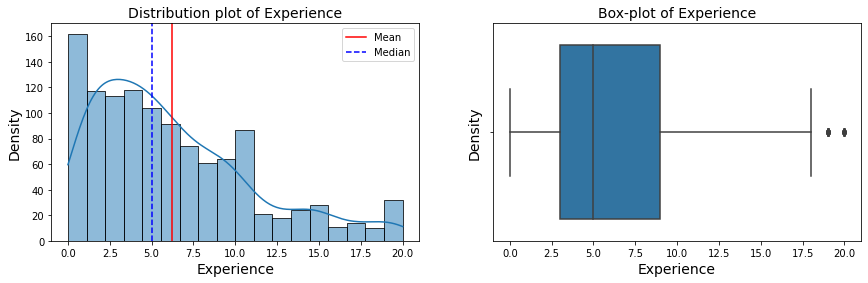

In [283]:
plt.subplot(1,2,1)
sns.histplot(data = dataset_outliers['Experience'], kde = True)
plt.axvline(x=dataset_outliers.Experience.mean(),color='red',label='Mean')
plt.axvline(x=dataset_outliers.Experience.median(),c='blue',ls='--',label='Median')
plt.legend()
plt.xlabel('Experience', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('Distribution plot of Experience', fontsize = 14)

plt.subplot(1,2,2)
sns.boxplot(data=dataset_outliers, x='Experience')
plt.xlabel('Experience', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('Box-plot of Experience', fontsize = 14)

plt.subplots_adjust(right=2.0)
plt.show()

There is no more any outlier present in Experience column.

##### Family Members

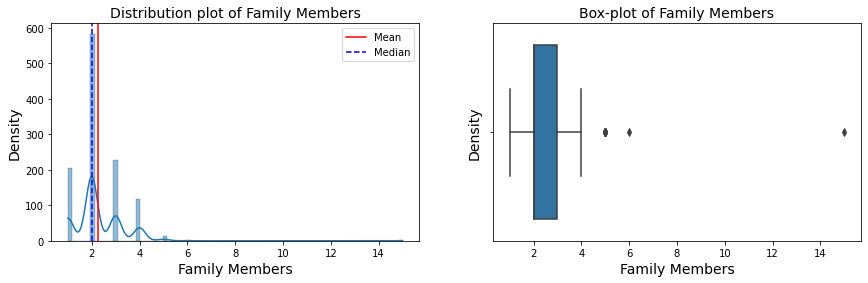

In [284]:
plt.subplot(1,2,1)
sns.histplot(data = dataset_outliers['Family_Members'], kde = True)
plt.axvline(x=dataset_outliers.Family_Members.mean(),color='red',label='Mean')
plt.axvline(x=dataset_outliers.Family_Members.median(),c='blue',ls='--',label='Median')
plt.legend()
plt.xlabel('Family Members', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('Distribution plot of Family Members', fontsize = 14)

plt.subplot(1,2,2)
sns.boxplot(data=dataset_outliers, x='Family_Members')
plt.xlabel('Family Members', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('Box-plot of Family Members', fontsize = 14)

plt.subplots_adjust(right=2.0)
plt.show()

Q1 = np.percentile(dataset_outliers['Family_Members'], 25, interpolation = 'midpoint')
Q2 = np.percentile(dataset_outliers['Family_Members'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(dataset_outliers['Family_Members'], 75, interpolation = 'midpoint')

print('First Quarter (25%):',Q1)
print('Second Quarter (50%):',Q2)
print('Third Quarter (75%):',Q3)

This output indicates that 25% of the data points have an Family_Members less than or equal to 2.0 (Q1), 50% have an Family_Members less than or equal to 2.0 (Q2, the median), and 75% have an Family_Members less than or equal to 3.0 (Q3)

In [285]:
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('Lower limit is', low_lim)
print('Upper limit is', up_lim)
outlier =[]
for x in dataset_outliers['Family_Members']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print('Outlier in the Family Members column is', outlier)

Interquartile range is 7.0
Lower limit is -7.5
Upper limit is 20.5
Outlier in the Family Members column is []


In [286]:
print('Total Outliers in Family Members column is', len(outlier))

Total Outliers in Family Members column is 0


In [287]:
dataset_outliers=dataset_outliers[dataset_outliers['Family_Members']<up_lim]

We have removed the rows where Family_Members is exceeding the upper limit.

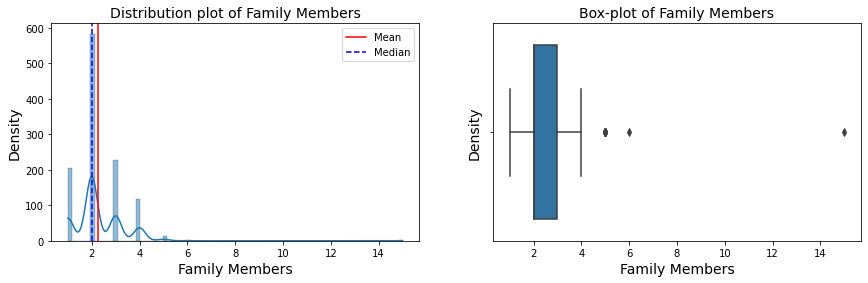

In [288]:
plt.subplot(1,2,1)
sns.histplot(data = dataset_outliers['Family_Members'], kde = True)
plt.axvline(x=dataset_outliers.Family_Members.mean(),color='red',label='Mean')
plt.axvline(x=dataset_outliers.Family_Members.median(),c='blue',ls='--',label='Median')
plt.legend()
plt.xlabel('Family Members', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('Distribution plot of Family Members', fontsize = 14)

plt.subplot(1,2,2)
sns.boxplot(data=dataset_outliers, x='Family_Members')
plt.xlabel('Family Members', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('Box-plot of Family Members', fontsize = 14)

plt.subplots_adjust(right=2.0)
plt.show()

There is no more any outlier present in Family_Members column.

#### Feature Encoding

In [289]:
dataset_encoding = dataset_outliers

In [290]:
dataset_encoding.shape

(1149, 19)

After removing all the outliers there are 1133 number of observations left in the dataset.

In [291]:
dataset_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 1 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_id           1149 non-null   int64  
 1   Gender           1149 non-null   object 
 2   Car_Owner        1149 non-null   object 
 3   Property_Owner   1149 non-null   object 
 4   Children         1149 non-null   int64  
 5   Annual_Income    1149 non-null   float64
 6   Income_Type      1149 non-null   object 
 7   Education        1149 non-null   object 
 8   Marital_Status   1149 non-null   object 
 9   Housing_Type     1149 non-null   object 
 10  Mobile_Phone     1149 non-null   int64  
 11  Work_Phone       1149 non-null   int64  
 12  Phone            1149 non-null   int64  
 13  Email_id         1149 non-null   int64  
 14  Occupation_Type  1149 non-null   object 
 15  Family_Members   1149 non-null   int64  
 16  label            1149 non-null   int64  
 17  Age           

There are 8 categorical features in the dataset, and the data types for these features are currently object (which usually indicates strings or textual data). The intention is to convert these categorical features into integer representations.

In [292]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for column in dataset_encoding:
    if dataset_encoding[column].dtype=='object':
        dataset_encoding[column]=le.fit_transform(dataset_encoding[column])

In [293]:
dataset_encoding.head()

,Ind_id,Gender,Car_Owner,Property_Owner,Children,Annual_Income,Income_Type,Education,Marital_Status,Housing_Type,Mobile_Phone,Work_Phone,Phone,Email_id,Occupation_Type,Family_Members,label,Age,Experience
1,5009744,0,1,0,0,315000.0,0,1,1,1,1,1,1,0,3,2,1,37.000000,2.0
2,5009746,0,1,0,0,315000.0,0,1,1,1,1,1,1,0,11,2,1,40.226519,2.0
3,5009749,0,1,0,0,234600.0,0,1,1,1,1,1,1,0,14,2,1,37.000000,2.0
4,5009752,0,1,0,0,315000.0,0,1,1,1,1,1,1,0,8,2,1,37.000000,2.0
5,5009753,1,1,0,0,315000.0,1,1,1,1,1,1,1,0,3,2,1,37.000000,2.0


In [294]:
dataset_encoding.shape

(1149, 19)

#### Dealing with Imbalanced Dataset

In [295]:
dataset_encoding['label'].value_counts()

0    1031
1     118
Name: label, dtype: int64

In [296]:
X = dataset_encoding.drop('label', axis=1)
y = dataset_encoding['label']

# Apply SMOTE to oversample the minority class
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=0)
X, y = smote.fit_resample(X, y)

In [297]:
y.value_counts()

1    1031
0    1031
Name: label, dtype: int64

#### Feature Selection

In [298]:
X = X.drop(['Ind_id','Children','Mobile_Phone','Work_Phone','Phone','Email_id'], axis=1)
X.head()

,Gender,Car_Owner,Property_Owner,Annual_Income,Income_Type,Education,Marital_Status,Housing_Type,Occupation_Type,Family_Members,Age,Experience
0,0,1,0,315000.0,0,1,1,1,3,2,37.000000,2.0
1,0,1,0,315000.0,0,1,1,1,11,2,40.226519,2.0
2,0,1,0,234600.0,0,1,1,1,14,2,37.000000,2.0
3,0,1,0,315000.0,0,1,1,1,8,2,37.000000,2.0
4,1,1,0,315000.0,1,1,1,1,3,2,37.000000,2.0


#### Splitting Data into Train and Test

In [299]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

We have split the independent variables (X) and dependent variables (y) into training and test sets with a ratio of 70% for training data and 30% for test data. We will build the model using the training data and evaluate the model's performance using the test data.

In [300]:
print("Shape of X_train data:", X_train.shape)
print("Shape of X_test data:", X_test.shape)
print("Shape of y_train data:", y_train.shape)
print("Shape of y_test data:", y_test.shape)

Shape of X_train data: (1443, 12)
Shape of X_test data: (619, 12)
Shape of y_train data: (1443,)
Shape of y_test data: (619,)


#### Fearture Scaling

In [302]:
# performing Z-Score Standardization (Standardization) technique
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_train_sc

array([[ 1.38815622, -0.73150966,  0.95062818, ...,  2.11510712,
         0.02588135, -0.42016629],
       [ 1.38815622, -0.73150966,  0.95062818, ..., -1.22052083,
        -1.58938238, -0.19219625],
       [-0.72038002,  1.36703595, -1.051936  , ..., -0.10864485,
        -0.48069289, -0.80931592],
       ...,
       [ 1.38815622,  1.36703595, -1.051936  , ..., -0.10864485,
        -1.93551033, -0.87610635],
       [-0.72038002, -0.73150966,  0.95062818, ..., -0.10864485,
        -0.55099856, -0.87610635],
       [ 1.38815622, -0.73150966,  0.95062818, ..., -0.10864485,
         1.33639161, -0.82136464]])

In [303]:
X_test_sc=sc.transform(X_test)
X_test_sc

array([[-0.72038002, -0.73150966,  0.95062818, ...,  2.11510712,
        -0.20487061,  2.31547409],
       [-0.72038002, -0.73150966, -1.051936  , ..., -1.22052083,
         0.78408985, -0.11367652],
       [-0.72038002,  1.36703595, -1.051936  , ..., -0.10864485,
        -0.18446324, -0.87610635],
       ...,
       [-0.72038002,  1.36703595, -1.051936  , ...,  1.00323114,
         0.37200929, -1.10407638],
       [ 1.38815622,  1.36703595, -1.051936  , ..., -0.10864485,
        -0.66637454, -0.64813632],
       [ 1.38815622, -0.73150966, -1.051936  , ..., -1.22052083,
         0.48738527, -0.42016629]])

Z-Score Standardization (also known as Standardization) is applied to both the X_train and X_test datasets. By standardizing the features, the data is transformed to have a mean of 0 and a standard deviation of 1.

This standardization allows models to learn the data more effectively, ensuring that no particular feature dominates the learning process due to its larger scale.

#### Model Selection

##### Logistic Regression

In [304]:
#Model Building
logistic_reg = LogisticRegression(random_state = 0)
logistic_reg.fit(X_train_sc, y_train)

LogisticRegression(random_state=0)

In [305]:
# regression coefficients
print('Coefficients: ', logistic_reg.coef_)

Coefficients:  [[-0.12105878 -0.33391127 -0.3645605  -0.1347811  -0.39813097 -0.16068125
  -0.31566203 -0.17599859 -0.41463267 -0.57017383  0.24532105 -0.33219468]]


Each value in the array corresponds to the coefficient of the respective feature in the dataset. These coefficients would explain how each feature influences the likelihood of an application being approved or, not.

In [306]:
y_pred = logistic_reg.predict(X_test_sc)
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,

The logistic regression model has predicted the first and second sample in the test data as Not Approved(0), 3rd sample as Approved(1), 4th sample as Approved(1), and so on.

In [307]:
cm = confusion_matrix(y_test, y_pred)
Accuracy = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Accuracy: ", Accuracy)
print("Confusion Matrix")
print(cm)
print("Classification Report")
print(cr)

Accuracy:  0.6591276252019386
Confusion Matrix
[[207 106]
 [105 201]]
Classification Report
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       313
           1       0.65      0.66      0.66       306

    accuracy                           0.66       619
   macro avg       0.66      0.66      0.66       619
weighted avg       0.66      0.66      0.66       619



1. From the above output we can see that, 65.9% data has been predicted correctly by the logistic regression model.
2. As per the Confusion Matrix, 207 instances has correctly predicted as positive, 201 Instances has correctly predicted as negative, 106 instances incorrectly predicted as positive and 105 instances incorrectly predicted as negative.

In [308]:
# Perform k-fold cross-validation (e.g., 5-fold cross-validation)
num_folds = 5
scores_train = cross_val_score(logistic_reg, X_train_sc, y_train, cv=num_folds)
scores_test = cross_val_score(logistic_reg, X_test_sc, y_test, cv=num_folds)

# Calculate the mean and standard deviation of the scores
mean_score_train = np.mean(scores_train)
std_score_train = np.std(scores_train)
mean_score_test = np.mean(scores_test)
std_score_test = np.std(scores_test)

# Print the scores
print("Cross-validation scores for Train Data:")
print(scores_train)
print("Cross-validation scores for Test Data:")
print(scores_test)

Cross-validation scores for Train Data:
[0.65397924 0.65397924 0.6816609  0.69444444 0.69097222]
Cross-validation scores for Test Data:
[0.71774194 0.66935484 0.66129032 0.64516129 0.71544715]


In [309]:
print(f"Mean accuracy for Train Data: {mean_score_train:.2f}")
print(f"Standard deviation for Train Data: {std_score_train:.2f}")
print(f"Mean accuracy for Test Data: {mean_score_test:.2f}")
print(f"Standard deviation for Test Data: {std_score_test:.2f}")

Mean accuracy for Train Data: 0.68
Standard deviation for Train Data: 0.02
Mean accuracy for Test Data: 0.68
Standard deviation for Test Data: 0.03


After performing 5-fold cross-validation, we obtained a mean accuracy of 68% with a standard deviation of 0.02 for the training data. Similarly, for the test data, the mean accuracy was 68% with a standard deviation of 0.03.

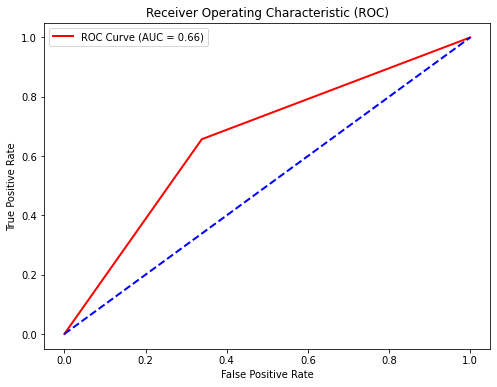

In [310]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

#Calculate the area under the curve(AUC)
roc_auc = auc(fpr, tpr)

#plot ROC Curve
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, color = 'red', lw = 2, label = 'ROC Curve (AUC = %0.2f)'% roc_auc)
plt.plot([0,1], [0,1], color = 'blue', lw = 2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'upper left')
plt.show()

1. The Receiver Operating Characteristic (ROC) curve is a graphical representation of a classification model's performance across different thresholds. It plots the true positive rate (Sensitivity) against the false positive rate (1 - Specificity) for various threshold values.
2. The above ROC curve where Area under the curve(AUC) is 0.66, indicating that the model has a moderate ability to differentiate between the Approved and not approved cases. But, this might not be sufficient for all applications.

##### Decission Tree

In [311]:
# decision tree classification without rescaled
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train_sc, y_train)

DecisionTreeClassifier()

In [312]:
y_pred_2 = DecisionTree.predict(X_test_sc)
y_pred_2

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,

In [313]:
cm = confusion_matrix(y_test, y_pred_2)
Accuracy = accuracy_score(y_test, y_pred_2)
cr = classification_report(y_test, y_pred_2)

print("Accuracy: ", Accuracy)
print("Confusion Matrix")
print(cm)
print("Classification Report")
print(cr)

Accuracy:  0.8287560581583199
Confusion Matrix
[[260  53]
 [ 53 253]]
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       313
           1       0.83      0.83      0.83       306

    accuracy                           0.83       619
   macro avg       0.83      0.83      0.83       619
weighted avg       0.83      0.83      0.83       619



1. From the above output, we can observe that the Decision Tree model has correctly predicted 82.87% of the data.

2. According to the Confusion Matrix, 260 instances have been accurately classified as positive, 253 instances have been correctly identified as negative, 53 instances have been mistakenly predicted as positive, and 53 instances have been erroneously classified as negative.

In [314]:
# Perform k-fold cross-validation (e.g., 5-fold cross-validation)
num_folds = 5
scores_train = cross_val_score(DecisionTree, X_train_sc, y_train, cv=num_folds)
scores_test = cross_val_score(DecisionTree, X_test_sc, y_test, cv=num_folds)

# Calculate the mean and standard deviation of the scores
mean_score_train = np.mean(scores_train)
std_score_train = np.std(scores_train)
mean_score_test = np.mean(scores_test)
std_score_test = np.std(scores_test)

# Print the scores
print("Cross-validation scores for Train Data:")
print(scores_train)
print("Cross-validation scores for Test Data:")
print(scores_test)

Cross-validation scores for Train Data:
[0.8200692  0.85467128 0.82698962 0.82986111 0.87152778]
Cross-validation scores for Test Data:
[0.86290323 0.76612903 0.7983871  0.81451613 0.70731707]


In [315]:
print(f"Mean accuracy for Train Data: {mean_score_train:.2f}")
print(f"Standard deviation for Train Data: {std_score_train:.2f}")
print(f"Mean accuracy for Test Data: {mean_score_test:.2f}")
print(f"Standard deviation for Test Data: {std_score_test:.2f}")

Mean accuracy for Train Data: 0.84
Standard deviation for Train Data: 0.02
Mean accuracy for Test Data: 0.79
Standard deviation for Test Data: 0.05


After performing 5-fold cross-validation, we obtained a mean accuracy of 84% with a standard deviation of 0.02 for the training data. Similarly, for the test data, the mean accuracy was 79% with a standard deviation of 0.05.

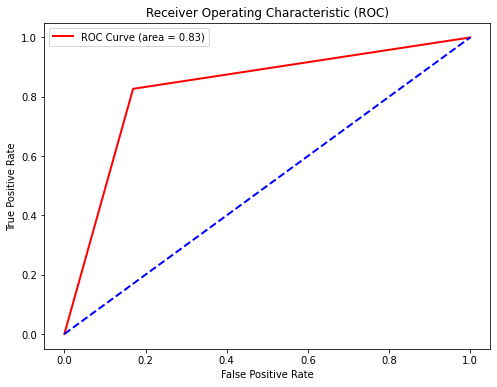

In [316]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_2)

#Calculate the area under the curve(AUC)
roc_auc = auc(fpr, tpr)

#plot ROC Curve
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, color = 'red', lw = 2, label = 'ROC Curve (area = %0.2f)'% roc_auc)
plt.plot([0,1], [0,1], color = 'blue', lw = 2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'upper left')
plt.show()

The above ROC curve where Area under the curve(AUC) is 0.83, indicates that the model has a strong ability to differentiate between positive and negative cases.

##### Random Forest

In [317]:
rf = RandomForestClassifier()
rf.fit(X_train_sc,y_train)

RandomForestClassifier()

In [318]:
y_pred_3 = rf.predict(X_test_sc)
y_pred_3

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,

According to the Random Forest model, the first sample in the test data has been predicted as Not Approved(0), the second, third, fourth and fifth sample as Approved(1), and so on.

In [319]:
cm = confusion_matrix(y_test, y_pred_3)
Accuracy = accuracy_score(y_test, y_pred_3)
cr = classification_report(y_test, y_pred_3)

print("Accuracy: ", Accuracy)
print("Confusion Matrix")
print(cm)
print("Classification Report")
print(cr)

Accuracy:  0.9305331179321487
Confusion Matrix
[[285  28]
 [ 15 291]]
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       313
           1       0.91      0.95      0.93       306

    accuracy                           0.93       619
   macro avg       0.93      0.93      0.93       619
weighted avg       0.93      0.93      0.93       619



1. From the above output, we can observe that the Random Forest model has correctly predicted 93.05% of the data.

2. According to the Confusion Matrix, 285 instances have been accurately classified as positive, 291 instances have been correctly identified as negative, 28 instances have been mistakenly predicted as positive, and 15 instances have been erroneously classified as negative.

3. As per the Classification Report,
   a. Precision: Out of all the instances predicted as Approved, 91% were correctly classified and out of all the instances predicted as Not Approved, 95% were correctly classified.

   b. Recall: The model correctly identified 91% of all Not Approved instances as well as 95% of all Approved instances.

In [320]:
# Perform k-fold cross-validation (e.g., 5-fold cross-validation)
num_folds = 5
scores_train = cross_val_score(rf, X_train_sc, y_train, cv=num_folds)
scores_test = cross_val_score(rf, X_test_sc, y_test, cv=num_folds)

# Calculate the mean and standard deviation of the scores
mean_score_train = np.mean(scores_train)
std_score_train = np.std(scores_train)
mean_score_test = np.mean(scores_test)
std_score_test = np.std(scores_test)

# Print the scores
print("Cross-validation scores for Train Data:")
print(scores_train)
print("Cross-validation scores for Test Data:")
print(scores_test)

Cross-validation scores for Train Data:
[0.90311419 0.9100346  0.91695502 0.90972222 0.94097222]
Cross-validation scores for Test Data:
[0.92741935 0.86290323 0.88709677 0.90322581 0.85365854]


In [321]:
print(f"Mean accuracy for Train Data: {mean_score_train:.2f}")
print(f"Standard deviation for Train Data: {std_score_train:.2f}")
print(f"Mean accuracy for Test Data: {mean_score_test:.2f}")
print(f"Standard deviation for Test Data: {std_score_test:.2f}")

Mean accuracy for Train Data: 0.92
Standard deviation for Train Data: 0.01
Mean accuracy for Test Data: 0.89
Standard deviation for Test Data: 0.03


After performing 5-fold cross-validation, we obtained a mean accuracy of 92% with a standard deviation of 0.01 for the training data. Similarly, for the test data, the mean accuracy was 89% with a standard deviation of 0.03.

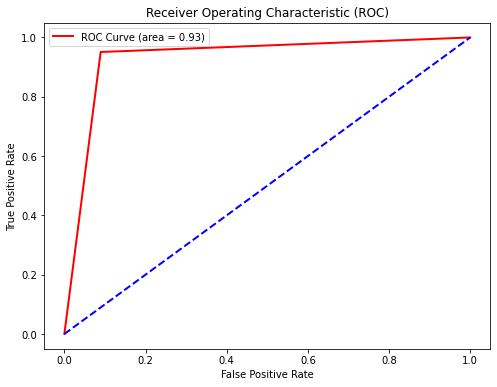

In [322]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_3)

#Calculate the area under the curve(AUC)
roc_auc = auc(fpr, tpr)

#plot ROC Curve
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, color = 'red', lw = 2, label = 'ROC Curve (area = %0.2f)'% roc_auc)
plt.plot([0,1], [0,1], color = 'blue', lw = 2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'upper left')
plt.show()

The ROC curve with an AUC of 0.93 signifies a highly effective model with strong discrimination power in distinguishing between positive and negative cases. This signifies random forest as a highly effective model.

#### K-Nearest Neighbors (KNN)

In [323]:
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski', p=2)
knn.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [324]:
y_pred_4 = knn.predict(X_test_sc)
y_pred_4

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,

In [325]:
cm = confusion_matrix(y_test, y_pred_4)
Accuracy = accuracy_score(y_test, y_pred_4)
cr = classification_report(y_test, y_pred_4)

print("Accuracy: ", Accuracy)
print("Confusion Matrix")
print(cm)
print("Classification Report")
print(cr)

Accuracy:  0.8109854604200323
Confusion Matrix
[[209 104]
 [ 13 293]]
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.67      0.78       313
           1       0.74      0.96      0.83       306

    accuracy                           0.81       619
   macro avg       0.84      0.81      0.81       619
weighted avg       0.84      0.81      0.81       619



In [326]:
# Perform k-fold cross-validation (e.g., 5-fold cross-validation)
num_folds = 5
scores_train = cross_val_score(knn, X_train_sc, y_train, cv=num_folds)
scores_test = cross_val_score(knn, X_test_sc, y_test, cv=num_folds)

# Calculate the mean and standard deviation of the scores
mean_score_train = np.mean(scores_train)
std_score_train = np.std(scores_train)
mean_score_test = np.mean(scores_test)
std_score_test = np.std(scores_test)

# Print the scores
print("Cross-validation scores for Train Data:")
print(scores_train)
print("Cross-validation scores for Test Data:")
print(scores_test)

Cross-validation scores for Train Data:
[0.8200692  0.76470588 0.76124567 0.76736111 0.78819444]
Cross-validation scores for Test Data:
[0.75       0.74193548 0.76612903 0.82258065 0.74796748]


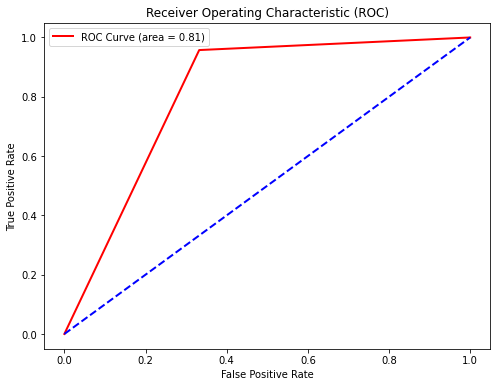

In [327]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_4)

#Calculate the area under the curve(AUC)
roc_auc = auc(fpr, tpr)

#plot ROC Curve
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, color = 'red', lw = 2, label = 'ROC Curve (area = %0.2f)'% roc_auc)
plt.plot([0,1], [0,1], color = 'blue', lw = 2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'upper left')
plt.show()

### Conclusion

After conducting extensive exploratory data analysis (EDA) and creating various graphs to analyze correlations among independent variables and their relationships with the dependent variable, we evaluated the performance of different classification models. The accuracy results were as follows:

a. Logistic Regression achieved an accuracy of 65.91%.

b. Decision Tree model yielded 82.87% accuracy.

c. Random Forest excelled with an impressive accuracy of 93.05%.

d. K-Nearest Neighbors demonstrated an accuracy of 81.09%.

Among these models, Random Forest stood out with an impressive accuracy of 93.05%. This analysis provides a robust basis for predicting credit card approvals.